# About This Project

**Final Year Project Title:**

Predictive modelling of football match results: a home vs. away perspective (Project ID: 2689)

**Prepared By:**

Nur Damia Binti Rohisyam (Student ID: 1211304435)

Bachelor of Computer Science (Honours) in Data Science Faculty of Computing and Informatics

**About This Notebook:**

This Python Jupyter Notebook (.ipynb) file demonstrates the designed framework to predict football match outcomes in the English Premier League (EPL) using machine learning algorithms. The initial phase begins with data pre-processing, feature selection, and feature engineering to ensure dataset cleanliness across 30 seasons (1993/1994 season to 2022/2023). After preprocessing, machine learning algorithms—Support Vector Machine, Logistic Regression, and Random Forest—are implemented. These models are trained on the dataset to identify patterns and relationships. Subsequently, the trained models are tested using separate testing data to evaluate their performance.
 


# Data and Library Insertion

In [187]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [188]:
# Load each season individually
import pandas as pd

# Define a function to remove empty columns
def remove_empty_columns(df, threshold=0.5):
    # Calculate the threshold for empty cells
    threshold_count = int(threshold * len(df))
    
    # Drop columns with more empty cells than the threshold
    df = df.dropna(axis=1, thresh=threshold_count)
    
    return df

# Read CSV files for seasons 2003-2004 and 2004-2005
# Read CSV files for seasons 2003-2004 and 2004-2005 with a specified encoding
season_2003_2004 = pd.read_csv('EPL Season 2003_2004.csv', encoding='latin-1')
season_2004_2005 = pd.read_csv('EPL Season 2004_2005.csv', encoding='latin-1')


# Remove empty columns
season_2003_2004_cleaned = remove_empty_columns(season_2003_2004)
season_2004_2005_cleaned = remove_empty_columns(season_2004_2005)

# Save cleaned data to new CSV files
season_2003_2004_cleaned.to_csv('EPL Season 2003_2004_cleaned.csv', index=False)
season_2004_2005_cleaned.to_csv('EPL Season 2004_2005_cleaned.csv', index=False)

#Data Added Here:--------------------------------
season_24 = pd.read_csv('EPL Season 1993_1994.csv')
season_25 = pd.read_csv('EPL Season 1994_1995.csv')
season_26 = pd.read_csv('EPL Season 1995_1996.csv')
season_27 = pd.read_csv('EPL Season 1996_1997.csv')
season_28 = pd.read_csv('EPL Season 1997_1998.csv')
season_29 = pd.read_csv('EPL Season 1998_1999.csv')
season_30 = pd.read_csv('EPL Season 1999_2000.csv')
#Data Added Here:--------------------------------
season_1 = pd.read_csv('EPL Season 2000_2001.csv')
season_2 = pd.read_csv('EPL Season 2001_2002.csv')
season_3 = pd.read_csv('EPL Season 2002_2003.csv')
season_4 = pd.read_csv('EPL Season 2003_2004_cleaned.csv')
season_5 = pd.read_csv('EPL Season 2004_2005_cleaned.csv')
season_6 = pd.read_csv('EPL Season 2005_2006.csv')
season_7 = pd.read_csv('EPL Season 2006_2007.csv')
season_8 = pd.read_csv('EPL Season 2007_2008.csv')
#-------------------------------------------------
season_9 = pd.read_csv('EPL Season 2008_2009.csv')
season_10 = pd.read_csv('EPL Season 2009_2010.csv')
season_11 = pd.read_csv('EPL Season 2010_2011.csv')
season_12 = pd.read_csv('EPL Season 2011_2012.csv')
season_13= pd.read_csv('EPL Season 2012_2013.csv')
season_14 = pd.read_csv('EPL Season 2013_2014.csv')
season_15 = pd.read_csv('EPL Season 2014_2015.csv')
season_16 = pd.read_csv('EPL Season 2015_2016.csv')
season_17= pd.read_csv('EPL Season 2016_2017.csv')
season_18= pd.read_csv('EPL Season 2017_2018.csv')
season_19= pd.read_csv('EPL Season 2018_2019.csv')
season_20= pd.read_csv('EPL Season 2019_2020.csv')
season_21= pd.read_csv('EPL Season 2020_2021.csv')
season_22= pd.read_csv('EPL Season 2021_2022.csv')
season_23= pd.read_csv('EPL Season 2022_2023.csv')


# Combine all seasons into one DataFrame
combined_data = pd.concat([ season_1,season_2,season_3,season_4,season_5,
season_6, season_7, season_8, season_9, season_10, season_11, season_12, season_13,
season_14, season_15, season_16, season_17, season_18, season_19, season_20, season_21, season_22, season_23,
                          season_24, season_25, season_26, season_27, season_28, season_29, season_30], ignore_index=True)

# Save the combined data to a new CSV file
combined_data.to_csv('EPL_30_SEASONS.csv', index=False) #result: total 5701 rows

In [189]:
#read combined data
original_EPL_data = pd.read_csv('EPL_30_SEASONS.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29340\2220621448.py:2: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  original_EPL_data = pd.read_csv('EPL_30_SEASONS.csv')


In [190]:
print (original_EPL_data)

       Div      Date  HomeTeam       AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  \
0       E0  19/08/00  Charlton       Man City   4.0   0.0    H   2.0   0.0   
1       E0  19/08/00   Chelsea       West Ham   4.0   2.0    H   1.0   0.0   
2       E0  19/08/00  Coventry  Middlesbrough   1.0   3.0    A   1.0   1.0   
3       E0  19/08/00     Derby    Southampton   2.0   2.0    D   1.0   2.0   
4       E0  19/08/00     Leeds        Everton   2.0   0.0    H   2.0   0.0   
...    ...       ...       ...            ...   ...   ...  ...   ...   ...   
12254  NaN       NaN       NaN            NaN   NaN   NaN  NaN   NaN   NaN   
12255  NaN       NaN       NaN            NaN   NaN   NaN  NaN   NaN   NaN   
12256  NaN       NaN       NaN            NaN   NaN   NaN  NaN   NaN   NaN   
12257  NaN       NaN       NaN            NaN   NaN   NaN  NaN   NaN   NaN   
12258  NaN       NaN       NaN            NaN   NaN   NaN  NaN   NaN   NaN   

       HTR  ...  Unnamed: 18 Unnamed: 19  Unnamed: 20  Unnamed:

In [191]:
original_EPL_data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,E0,19/08/00,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,19/08/00,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,19/08/00,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,19/08/00,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,19/08/00,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Pre-Processing

## Early Data Cleaning Process

In [192]:
for column_name in original_EPL_data.columns:
    print(column_name)

Div
Date
HomeTeam
AwayTeam
FTHG
FTAG
FTR
HTHG
HTAG
HTR
Attendance
Referee
HS
AS
HST
AST
HHW
AHW
HC
AC
HF
AF
HO
AO
HY
AY
HR
AR
HBP
ABP
GBH
GBD
GBA
IWH
IWD
IWA
LBH
LBD
LBA
SBH
SBD
SBA
WHH
WHD
WHA
SYH
SYD
SYA
B365H
B365D
B365A
SOH
SOD
SOA
GB>2.5
GB<2.5
B365>2.5
B365<2.5
Unnamed: 48
Unnamed: 49
Unnamed: 50
Unnamed: 51
Unnamed: 52
GBAHH
GBAHA
GBAH
LBAHH
LBAHA
LBAH
B365AHH
B365AHA
B365AH
BWH
BWD
BWA
SJH
SJD
SJA
VCH
VCD
VCA
Bb1X2
BbMxH
BbAvH
BbMxD
BbAvD
BbMxA
BbAvA
BbOU
BbMx>2.5
BbAv>2.5
BbMx<2.5
BbAv<2.5
BbAH
BbAHh
BbMxAHH
BbAvAHH
BbMxAHA
BbAvAHA
BSH
BSD
BSA
PSH
PSD
PSA
PSCH
PSCD
PSCA
Time
MaxH
MaxD
MaxA
AvgH
AvgD
AvgA
P>2.5
P<2.5
Max>2.5
Max<2.5
Avg>2.5
Avg<2.5
AHh
PAHH
PAHA
MaxAHH
MaxAHA
AvgAHH
AvgAHA
B365CH
B365CD
B365CA
BWCH
BWCD
BWCA
IWCH
IWCD
IWCA
WHCH
WHCD
WHCA
VCCH
VCCD
VCCA
MaxCH
MaxCD
MaxCA
AvgCH
AvgCD
AvgCA
B365C>2.5
B365C<2.5
PC>2.5
PC<2.5
MaxC>2.5
MaxC<2.5
AvgC>2.5
AvgC<2.5
AHCh
B365CAHH
B365CAHA
PCAHH
PCAHA
MaxCAHH
MaxCAHA
AvgCAHH
AvgCAHA
Unnamed: 7
Unnamed: 8
Unnamed: 9
Unname

In [193]:
# check dimensionality
print("Number of rows:", original_EPL_data.shape[0])
print("Number of features/columns:", original_EPL_data.shape[1] )

Number of rows: 12259
Number of features/columns: 187


In [194]:
# To Drop multiple columns
# All columns related to  betting odds will be dropped
columns_to_drop = [
    'Attendance', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'Referee',
    'HHW', 'AHW', 'HO', 'AO', 'HBP', 'ABP', 'GBH', 'GBD', 
    'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'SBH', 'SBD', 'SBA', 'WHH', 
    'WHD', 'WHA', 'SYH', 'SYD', 'SYA', 'B365H', 'B365D', 'B365A', 'SOH', 'SOD', 
    'SOA', 'GB>2.5', 'GB<2.5', 'B365>2.5', 'B365<2.5', 'Unnamed: 48', 'Unnamed: 49', 
    'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'GBAHH', 'GBAHA', 'GBAH', 'LBAHH', 
    'LBAHA', 'LBAH', 'B365AHH', 'B365AHA', 'B365AH', 'BWH', 'BWD', 'BWA', 'SJH', 'SJD', 
    'SJA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 
    'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 
    'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'BSH', 'BSD', 'BSA', 'PSH', 'PSD', 
    'PSA', 'PSCH', 'PSCD', 'PSCA', 'Time', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 
    'AvgA', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'PAHH', 
    'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 
    'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 
    'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 
    'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 
    'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA', 'Unnamed: 7', 'Unnamed: 8', 
    'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 
    'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 
    'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 
    'Unnamed: 27'
]

# Check which columns are present in the dataframe
existing_columns = original_EPL_data.columns
print("Existing columns:", existing_columns)

# Adjust columns_to_drop to only include columns that are present in the dataframe
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop the columns and create a new dataframe
df = original_EPL_data.drop(columns=columns_to_drop)
print(df.head())
df = original_EPL_data.drop(columns=columns_to_drop) #new dataframe (after removing betting columns)
print(df.head())

Existing columns: Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR',
       ...
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27'],
      dtype='object', length=187)
   FTHG  FTAG FTR  HTHG  HTAG HTR    HS    AS   HST  AST   HC   AC    HF  \
0   4.0   0.0   H   2.0   0.0   H  17.0   8.0  14.0  4.0  6.0  6.0  13.0   
1   4.0   2.0   H   1.0   0.0   H  17.0  12.0  10.0  5.0  7.0  7.0  19.0   
2   1.0   3.0   A   1.0   1.0   D   6.0  16.0   3.0  9.0  8.0  4.0  15.0   
3   2.0   2.0   D   1.0   2.0   A   6.0  13.0   4.0  6.0  5.0  8.0  11.0   
4   2.0   0.0   H   2.0   0.0   H  17.0  12.0   8.0  6.0  6.0  4.0  21.0   

     AF   HY   AY   HR   AR  
0  12.0  1.0  2.0  0.0  0.0  
1  14.0  1.0  2.0  0.0  0.0  
2  21.0  5.0  3.0  1.0  0.0  
3  13.0  1.0  1.0  0.0  0.0  
4  20.0  1.0  3.0  0.0  0.0  
   FTHG  FTAG FTR  HTHG  HTAG

In [195]:
print(columns_to_drop)

['Attendance', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'Referee', 'HHW', 'AHW', 'HO', 'AO', 'HBP', 'ABP', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SYH', 'SYD', 'SYA', 'B365H', 'B365D', 'B365A', 'SOH', 'SOD', 'SOA', 'GB>2.5', 'GB<2.5', 'B365>2.5', 'B365<2.5', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'GBAHH', 'GBAHA', 'GBAH', 'LBAHH', 'LBAHA', 'LBAH', 'B365AHH', 'B365AHA', 'B365AH', 'BWH', 'BWD', 'BWA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'BSH', 'BSD', 'BSA', 'PSH', 'PSD', 'PSA', 'PSCH', 'PSCD', 'PSCA', 'Time', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA'

In [196]:
# Save the new dataframe to a new CSV file
df.to_csv('UPDATED_EPL_all15seasons.csv', index=False) #new dataframe (after removing betting columns) is saved

In [197]:
# check dimensionality of the new dataframe
print("Number of rows:", df.shape[0])
print("Number of features/columns:", df.shape[1] )

Number of rows: 12259
Number of features/columns: 18


In [198]:
import pandas as pd

# Assuming df is your DataFrame
# Before renaming
before_column_names = df.columns.tolist()

# Rename columns for readability
new_columns_name = {
    'FTHG': 'Full_Time_Home_Team_Goals',
    'FTAG': 'Full_Time_Away_Team_Goals',
    'FTR': 'Full_Time_Result', #(H=Home Win, D=Draw, A=Away Win)
    'HTHG': 'Half_Time_Home_Team_Goals',
    'HTAG': 'Half_Time_Away_Team_Goals',
    'HTR': 'Half_Time_Result',
    'HS': 'Home_Team_Shots',
    'AS': 'Away_Team_Shots',
    'HST': 'Home_Team_Shots_on_Target',
    'AST': 'Away_Team_Shots_on_Target',
    'HF': 'Home_Team_Fouls_Committed',
    'AF': 'Away_Team_Fouls_Committed',
    'HC': 'Home_Team_Corners',
    'AC': 'Away_Team_Corners',
    'HY': 'Home_Team_Yellow_Cards',
    'AY': 'Away_Team_Yellow_Cards',
    'HR': 'Home_Team_Red_Cards',
    'AR': 'Away_Team_Red_Cards'
}

# Use the rename() method to rename the columns
df = df.rename(columns=new_columns_name)

# After renaming
after_column_names = df.columns.tolist()

# Combine both lists for side-by-side comparison
comparison = pd.DataFrame({'Before Renaming': before_column_names, 'After Renaming': after_column_names})
print(comparison)

   Before Renaming             After Renaming
0             FTHG  Full_Time_Home_Team_Goals
1             FTAG  Full_Time_Away_Team_Goals
2              FTR           Full_Time_Result
3             HTHG  Half_Time_Home_Team_Goals
4             HTAG  Half_Time_Away_Team_Goals
5              HTR           Half_Time_Result
6               HS            Home_Team_Shots
7               AS            Away_Team_Shots
8              HST  Home_Team_Shots_on_Target
9              AST  Away_Team_Shots_on_Target
10              HC          Home_Team_Corners
11              AC          Away_Team_Corners
12              HF  Home_Team_Fouls_Committed
13              AF  Away_Team_Fouls_Committed
14              HY     Home_Team_Yellow_Cards
15              AY     Away_Team_Yellow_Cards
16              HR        Home_Team_Red_Cards
17              AR        Away_Team_Red_Cards


In [199]:
#missing value
print("Missing Value:")
df.isna().sum()

Missing Value:


Full_Time_Home_Team_Goals     697
Full_Time_Away_Team_Goals     697
Full_Time_Result              697
Half_Time_Home_Team_Goals    1621
Half_Time_Away_Team_Goals    1621
Half_Time_Result             1621
Home_Team_Shots              3521
Away_Team_Shots              3521
Home_Team_Shots_on_Target    3521
Away_Team_Shots_on_Target    3521
Home_Team_Corners            3521
Away_Team_Corners            3521
Home_Team_Fouls_Committed    3521
Away_Team_Fouls_Committed    3521
Home_Team_Yellow_Cards       3521
Away_Team_Yellow_Cards       3521
Home_Team_Red_Cards          3521
Away_Team_Red_Cards          3521
dtype: int64

In [200]:
# Check for missing values in each row
missing_rows = df[df.isna().any(axis=1)]

# Display rows with missing values
print(missing_rows)

       Full_Time_Home_Team_Goals  Full_Time_Away_Team_Goals Full_Time_Result  \
5698                         NaN                        NaN              NaN   
8739                         0.0                        3.0                A   
8740                         4.0                        1.0                H   
8741                         1.0                        2.0                A   
8742                         2.0                        0.0                H   
...                          ...                        ...              ...   
12254                        NaN                        NaN              NaN   
12255                        NaN                        NaN              NaN   
12256                        NaN                        NaN              NaN   
12257                        NaN                        NaN              NaN   
12258                        NaN                        NaN              NaN   

       Half_Time_Home_Team_Goals  Half_

In [201]:
#to drop all rows with missing value
df = df.dropna() #in this case row 2660 will be removed

In [202]:
#missing value
df.isna().sum() #as result, no missing value left

Full_Time_Home_Team_Goals    0
Full_Time_Away_Team_Goals    0
Full_Time_Result             0
Half_Time_Home_Team_Goals    0
Half_Time_Away_Team_Goals    0
Half_Time_Result             0
Home_Team_Shots              0
Away_Team_Shots              0
Home_Team_Shots_on_Target    0
Away_Team_Shots_on_Target    0
Home_Team_Corners            0
Away_Team_Corners            0
Home_Team_Fouls_Committed    0
Away_Team_Fouls_Committed    0
Home_Team_Yellow_Cards       0
Away_Team_Yellow_Cards       0
Home_Team_Red_Cards          0
Away_Team_Red_Cards          0
dtype: int64

In [203]:
print(df)

      Full_Time_Home_Team_Goals  Full_Time_Away_Team_Goals Full_Time_Result  \
0                           4.0                        0.0                H   
1                           4.0                        2.0                H   
2                           1.0                        3.0                A   
3                           2.0                        2.0                D   
4                           2.0                        0.0                H   
...                         ...                        ...              ...   
8734                        1.0                        0.0                H   
8735                        1.0                        4.0                A   
8736                        2.0                        1.0                H   
8737                        2.0                        1.0                H   
8738                        4.0                        4.0                D   

      Half_Time_Home_Team_Goals  Half_Time_Away_Tea

In [204]:
#duplicate
print("Total duplicated rows: ", sum(df.duplicated()))

# drop duplicates
df = df.drop_duplicates()

Total duplicated rows:  0


In [205]:
df.tail()

,Full_Time_Home_Team_Goals,Full_Time_Away_Team_Goals,Full_Time_Result,Half_Time_Home_Team_Goals,Half_Time_Away_Team_Goals,Half_Time_Result,Home_Team_Shots,Away_Team_Shots,Home_Team_Shots_on_Target,Away_Team_Shots_on_Target,Home_Team_Corners,Away_Team_Corners,Home_Team_Fouls_Committed,Away_Team_Fouls_Committed,Home_Team_Yellow_Cards,Away_Team_Yellow_Cards,Home_Team_Red_Cards,Away_Team_Red_Cards
8734,1.0,0.0,H,0.0,0.0,D,13.0,7.0,6.0,2.0,9.0,3.0,11.0,12.0,1.0,3.0,0.0,0.0
8735,1.0,4.0,A,0.0,1.0,A,19.0,11.0,2.0,7.0,12.0,3.0,7.0,5.0,3.0,0.0,0.0,0.0
8736,2.0,1.0,H,1.0,0.0,H,13.0,16.0,4.0,3.0,3.0,5.0,8.0,10.0,1.0,1.0,0.0,0.0
8737,2.0,1.0,H,1.0,1.0,D,21.0,10.0,8.0,3.0,5.0,4.0,14.0,10.0,1.0,2.0,0.0,0.0
8738,4.0,4.0,D,2.0,2.0,D,15.0,30.0,10.0,8.0,2.0,9.0,4.0,10.0,0.0,2.0,0.0,0.0


In [206]:
# To divide attributes for analysis purposes

# Target Attribute
target = ['Full_Time_Result']

# Numerical Attributes
numerical_attributes = [
    'Full_Time_Home_Team_Goals', 'Full_Time_Away_Team_Goals',
    'Half_Time_Home_Team_Goals', 'Half_Time_Away_Team_Goals',
    'Home_Team_Shots_on_Target', 'Away_Team_Shots_on_Target',
    'Home_Team_Fouls_Committed', 'Away_Team_Fouls_Committed',
    'Home_Team_Corners', 'Away_Team_Corners','Home_Team_Shots',
    'Away_Team_Shots','Home_Team_Yellow_Cards', 'Away_Team_Yellow_Cards',
    'Home_Team_Red_Cards', 'Away_Team_Red_Cards'
]

# Categorical Attribute
#football_categorical = ['Half_Time_Result','League_Division', 'Match_Date', 'HomeTeam', 'AwayTeam']

print("Numerical Features:", numerical_attributes)
print("\nTarget:", target)
#print("\nFootball_Categorical:", football_categorical)


Numerical Features: ['Full_Time_Home_Team_Goals', 'Full_Time_Away_Team_Goals', 'Half_Time_Home_Team_Goals', 'Half_Time_Away_Team_Goals', 'Home_Team_Shots_on_Target', 'Away_Team_Shots_on_Target', 'Home_Team_Fouls_Committed', 'Away_Team_Fouls_Committed', 'Home_Team_Corners', 'Away_Team_Corners', 'Home_Team_Shots', 'Away_Team_Shots', 'Home_Team_Yellow_Cards', 'Away_Team_Yellow_Cards', 'Home_Team_Red_Cards', 'Away_Team_Red_Cards']

Target: ['Full_Time_Result']


In [207]:
#check unique values for each attribute (target variable)
for i in target:
  values = df[i].unique().tolist()
  print(i,': ',values)

#check unique values for each attribute (football variable)
for i in numerical_attributes:
  values = df[i].unique().tolist()
  print(i,': ',values)

#check unique values for each attribute (categorical variable)
#for i in numerical_attributes:
#  values = df[i].unique().tolist()
#  print(i,': ',values)


Full_Time_Result :  ['H', 'A', 'D']
Full_Time_Home_Team_Goals :  [4.0, 1.0, 2.0, 0.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0]
Full_Time_Away_Team_Goals :  [0.0, 2.0, 3.0, 1.0, 4.0, 5.0, 6.0, 7.0, 9.0]
Half_Time_Home_Team_Goals :  [2.0, 1.0, 0.0, 3.0, 5.0, 4.0]
Half_Time_Away_Team_Goals :  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Home_Team_Shots_on_Target :  [14.0, 10.0, 3.0, 4.0, 8.0, 2.0, 6.0, 9.0, 12.0, 5.0, 7.0, 1.0, 13.0, 11.0, 0.0, 19.0, 15.0, 18.0, 16.0, 17.0, 21.0, 20.0, 24.0, 22.0]
Away_Team_Shots_on_Target :  [4.0, 5.0, 9.0, 6.0, 3.0, 2.0, 7.0, 8.0, 11.0, 1.0, 10.0, 0.0, 14.0, 12.0, 15.0, 13.0, 18.0, 17.0, 20.0, 16.0, 19.0]
Home_Team_Fouls_Committed :  [13.0, 19.0, 15.0, 11.0, 21.0, 12.0, 8.0, 10.0, 14.0, 7.0, 25.0, 9.0, 17.0, 24.0, 23.0, 18.0, 16.0, 6.0, 5.0, 0.0, 20.0, 22.0, 28.0, 26.0, 4.0, 3.0, 2.0, 27.0, 1.0, 33.0]
Away_Team_Fouls_Committed :  [12.0, 14.0, 21.0, 13.0, 20.0, 8.0, 16.0, 7.0, 18.0, 15.0, 11.0, 9.0, 10.0, 6.0, 24.0, 22.0, 17.0, 5.0, 19.0, 28.0, 1.0, 23.0, 26.0, 25.0, 3.0, 29.0, 

In [208]:
#check data types
df.dtypes

Full_Time_Home_Team_Goals    float64
Full_Time_Away_Team_Goals    float64
Full_Time_Result              object
Half_Time_Home_Team_Goals    float64
Half_Time_Away_Team_Goals    float64
Half_Time_Result              object
Home_Team_Shots              float64
Away_Team_Shots              float64
Home_Team_Shots_on_Target    float64
Away_Team_Shots_on_Target    float64
Home_Team_Corners            float64
Away_Team_Corners            float64
Home_Team_Fouls_Committed    float64
Away_Team_Fouls_Committed    float64
Home_Team_Yellow_Cards       float64
Away_Team_Yellow_Cards       float64
Home_Team_Red_Cards          float64
Away_Team_Red_Cards          float64
dtype: object

In [209]:
# change attributes to integer
columns_to_convert= [
    'Full_Time_Home_Team_Goals', 'Full_Time_Away_Team_Goals',
    'Half_Time_Home_Team_Goals', 'Half_Time_Away_Team_Goals',
    'Home_Team_Shots', 'Away_Team_Shots',
    'Home_Team_Shots_on_Target', 'Away_Team_Shots_on_Target',
    'Home_Team_Fouls_Committed', 'Away_Team_Fouls_Committed',
    'Home_Team_Corners', 'Away_Team_Corners',
    'Home_Team_Yellow_Cards', 'Away_Team_Yellow_Cards',
    'Home_Team_Red_Cards', 'Away_Team_Red_Cards'
]
#df['Match_Date'] = pd.to_datetime(df['Match_Date'], format='%d/%m/%y', errors='coerce')
df[columns_to_convert] = df[columns_to_convert].astype(int)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 8738 entries, 0 to 8738
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Full_Time_Home_Team_Goals  8738 non-null   int32 
 1   Full_Time_Away_Team_Goals  8738 non-null   int32 
 2   Full_Time_Result           8738 non-null   object
 3   Half_Time_Home_Team_Goals  8738 non-null   int32 
 4   Half_Time_Away_Team_Goals  8738 non-null   int32 
 5   Half_Time_Result           8738 non-null   object
 6   Home_Team_Shots            8738 non-null   int32 
 7   Away_Team_Shots            8738 non-null   int32 
 8   Home_Team_Shots_on_Target  8738 non-null   int32 
 9   Away_Team_Shots_on_Target  8738 non-null   int32 
 10  Home_Team_Corners          8738 non-null   int32 
 11  Away_Team_Corners          8738 non-null   int32 
 12  Home_Team_Fouls_Committed  8738 non-null   int32 
 13  Away_Team_Fouls_Committed  8738 non-null   int32 
 14  Home_Team_Yel

In [210]:
# show the mean, std, min..max of dataset
description = df.select_dtypes(include=['int32']).describe()
print(description)

       Full_Time_Home_Team_Goals  Full_Time_Away_Team_Goals  \
count                8738.000000                8738.000000   
mean                    1.525406                   1.159533   
std                     1.304629                   1.146558   
min                     0.000000                   0.000000   
25%                     1.000000                   0.000000   
50%                     1.000000                   1.000000   
75%                     2.000000                   2.000000   
max                     9.000000                   9.000000   

       Half_Time_Home_Team_Goals  Half_Time_Away_Team_Goals  Home_Team_Shots  \
count                8738.000000                8738.000000      8738.000000   
mean                    0.685054                   0.510300        13.528153   
std                     0.835659                   0.725252         5.281279   
min                     0.000000                   0.000000         0.000000   
25%                     0.000000

## Exploratory Data Analysis

In [211]:
#cleaned dataset
df_clean = df.copy()

Full_Time_Result
H    4020
A    2547
D    2171
Name: count, dtype: int64


Text(0.5, 1.0, "'Full Time Result'")

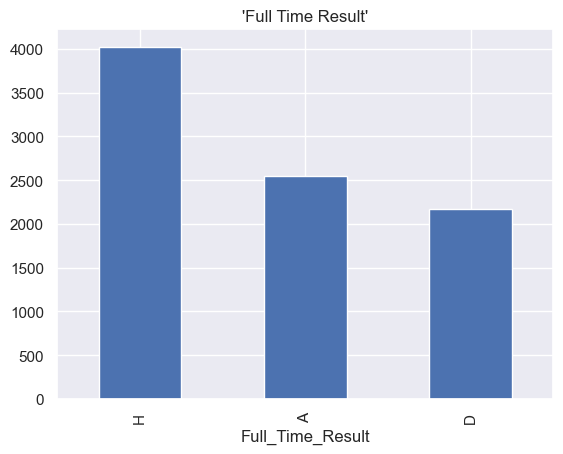

In [212]:
target = df_clean['Full_Time_Result']
print(target.value_counts())
target.value_counts().plot(kind="bar")
plt.title("'Full Time Result'")

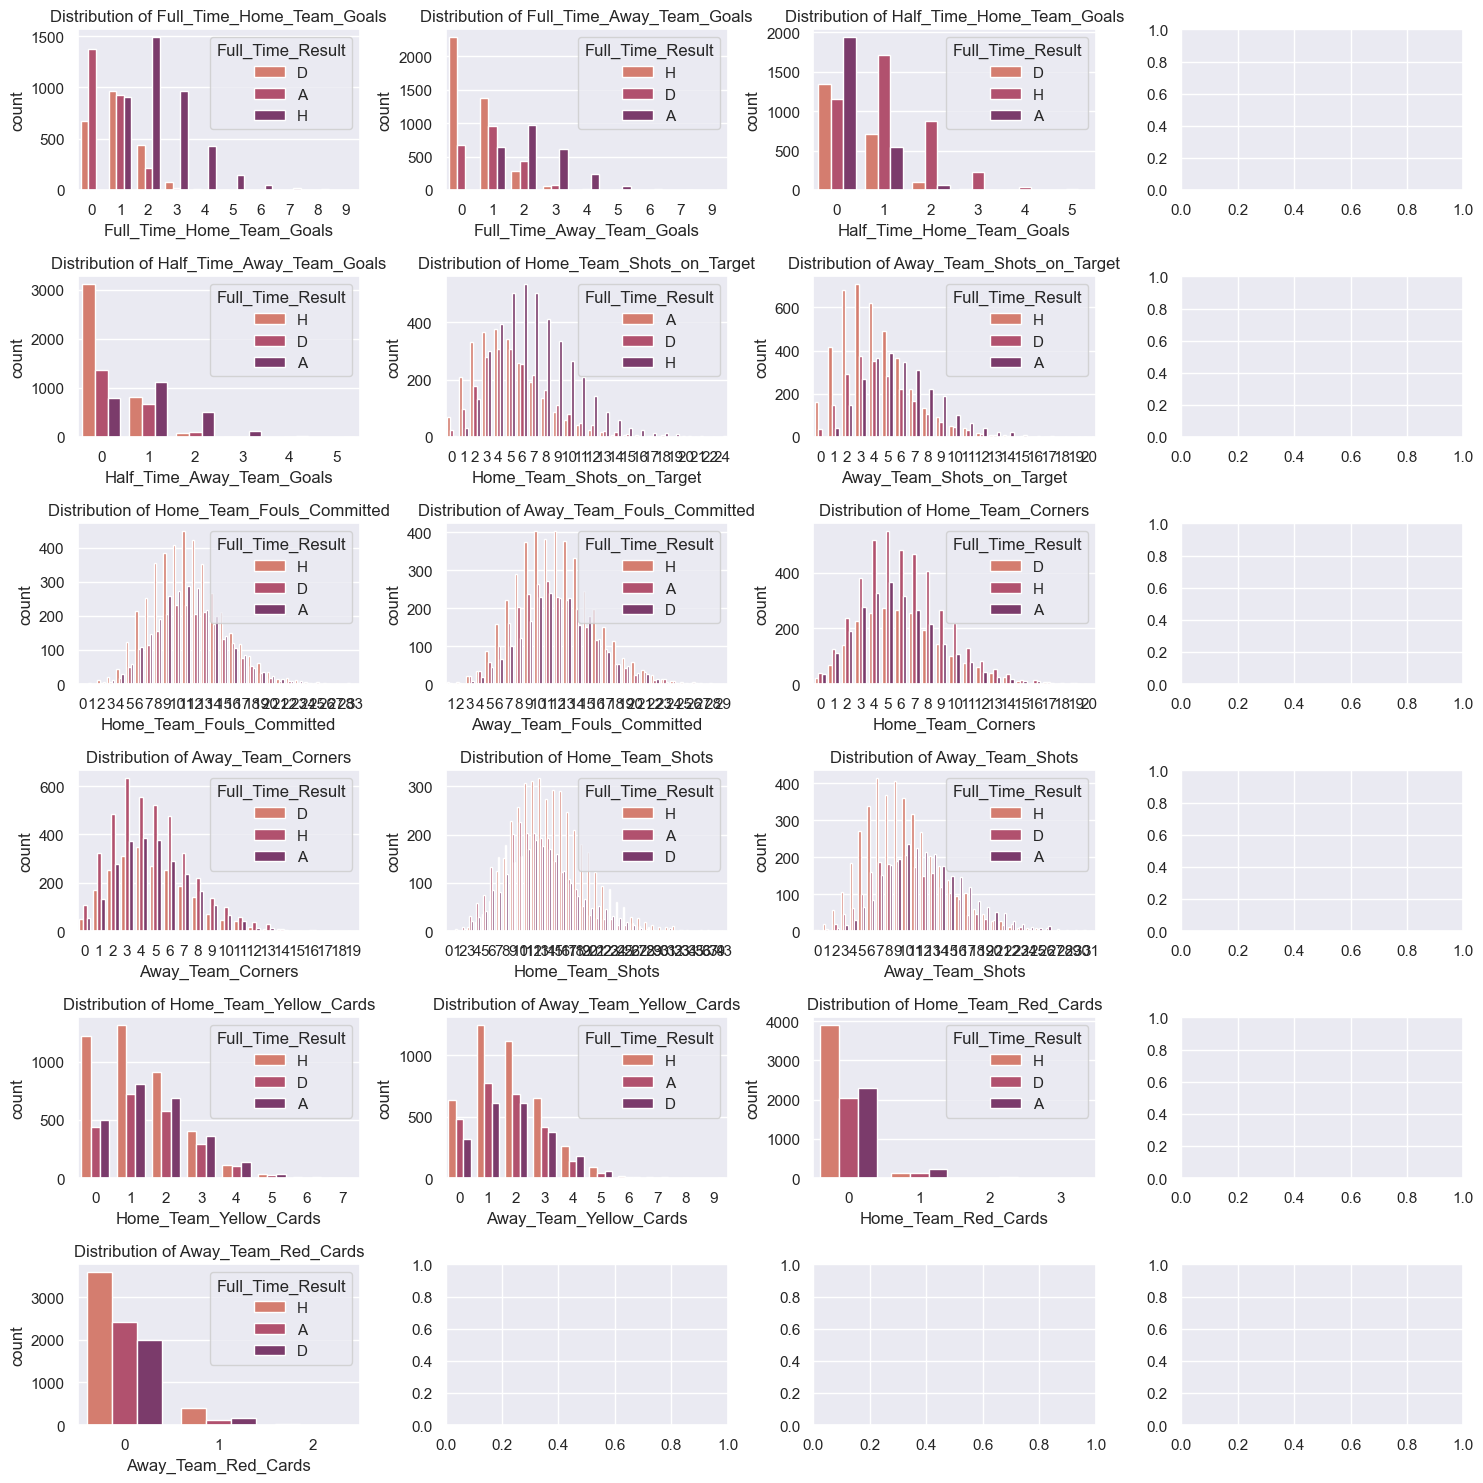

In [213]:
# Exclude normalized attributes from football_features
#football_features = [feature for feature in football_features if feature not in attributes_to_normalize]

# Set up subplots for plotting
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Loop through  features and create plots
for i, feature in enumerate(numerical_attributes):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, hue='Full_Time_Result', data=df_clean, ax=axes[row, col], palette='flare')
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


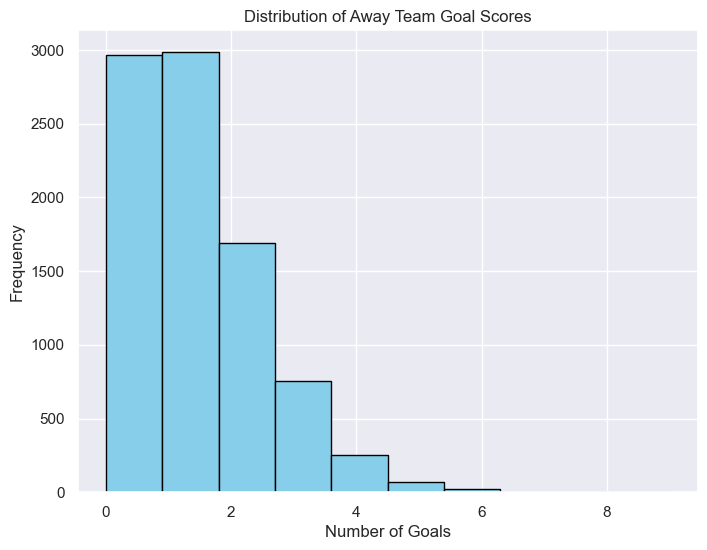

In [214]:
import matplotlib.pyplot as plt

# Plot histogram for away team goal scores
plt.figure(figsize=(8, 6))
plt.hist(df_clean['Full_Time_Away_Team_Goals'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Away Team Goal Scores')
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


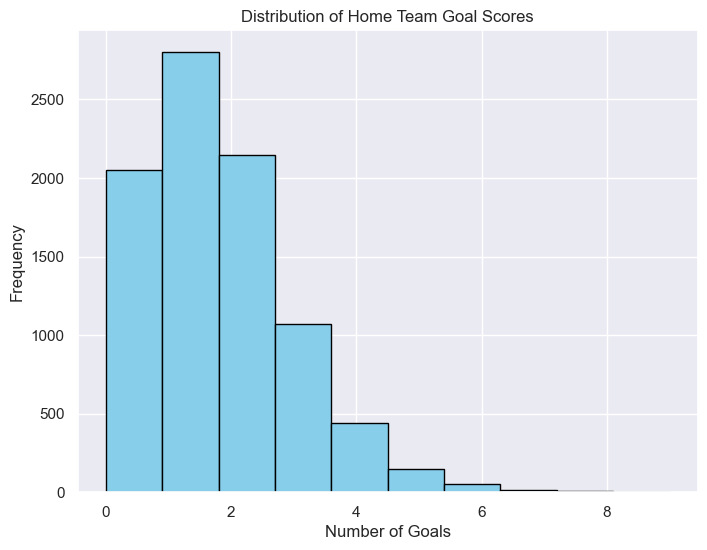

In [215]:
import matplotlib.pyplot as plt

# Plot histogram for away team goal scores
plt.figure(figsize=(8, 6))
plt.hist(df_clean['Full_Time_Home_Team_Goals'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Home Team Goal Scores')
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

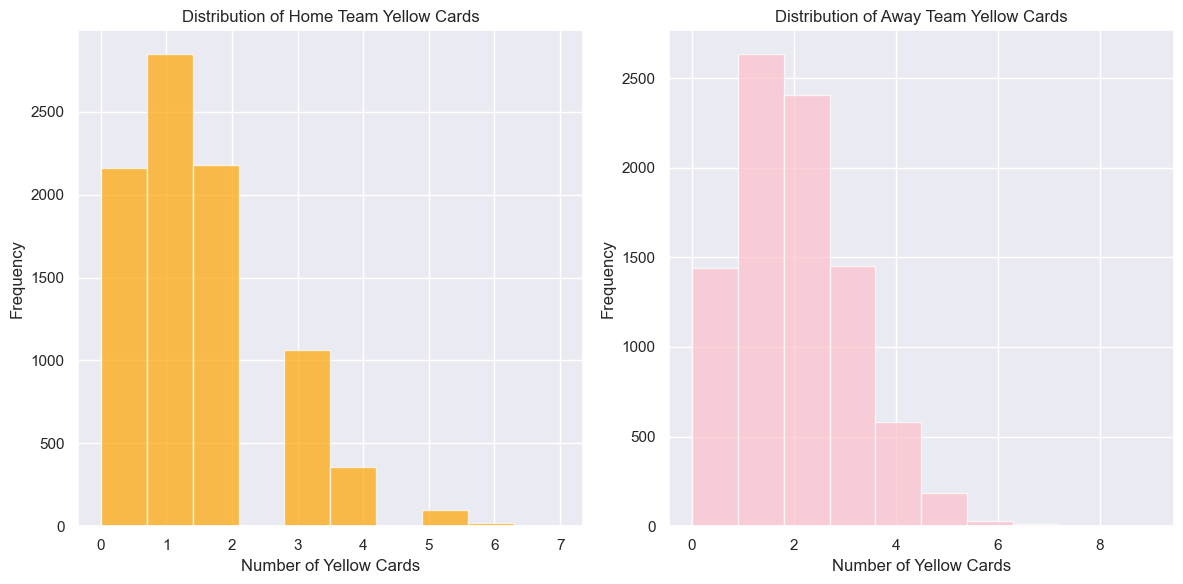

In [216]:
import matplotlib.pyplot as plt

# Set up subplots for plotting
plt.figure(figsize=(12, 6))

# Plot histogram for home team yellow cards
plt.subplot(1, 2, 1)
plt.hist(df_clean['Home_Team_Yellow_Cards'], color='orange', alpha=0.7)
plt.title('Distribution of Home Team Yellow Cards')
plt.xlabel('Number of Yellow Cards')
plt.ylabel('Frequency')

# Plot histogram for away team yellow cards
plt.subplot(1, 2, 2)
plt.hist(df_clean['Away_Team_Yellow_Cards'], color='pink', alpha=0.7)
plt.title('Distribution of Away Team Yellow Cards')
plt.xlabel('Number of Yellow Cards')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


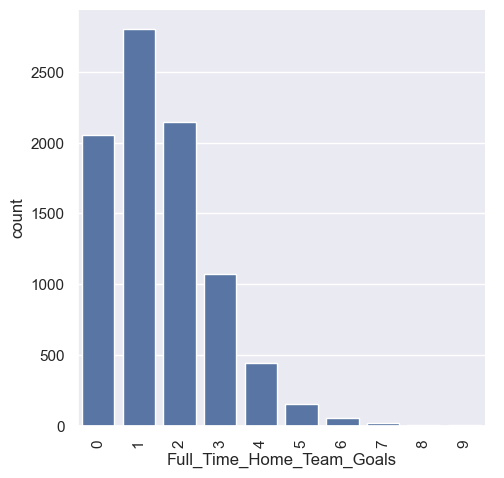

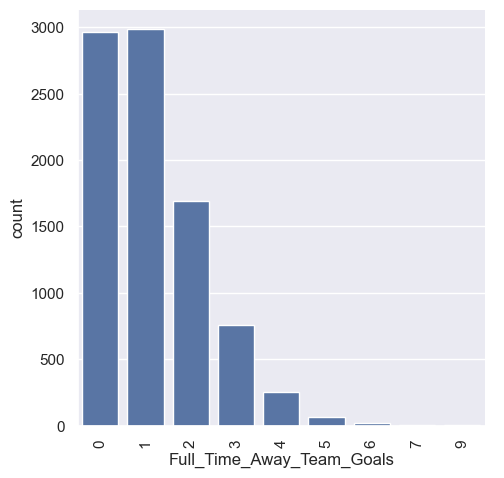

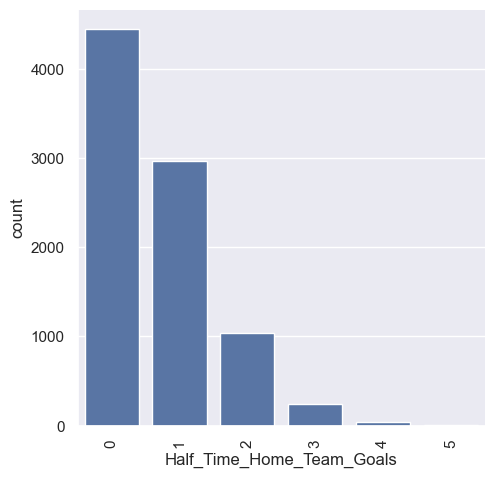

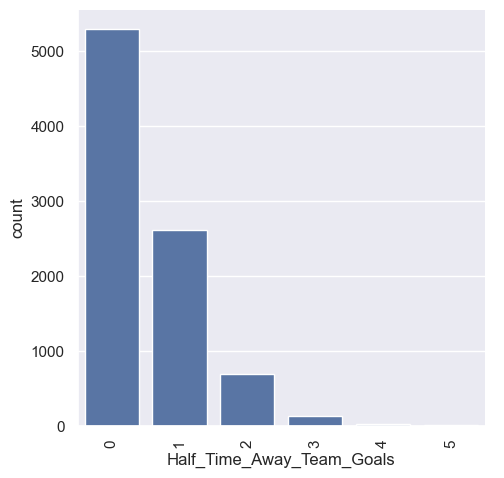

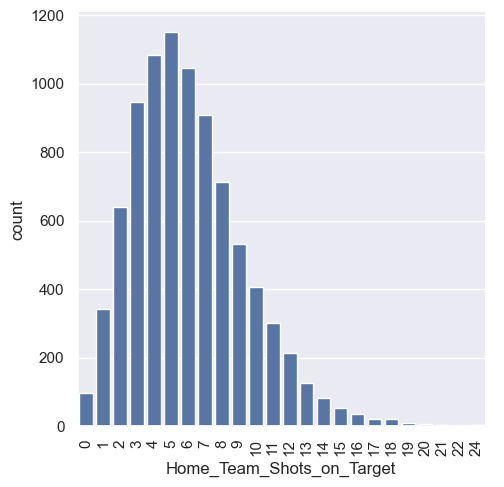

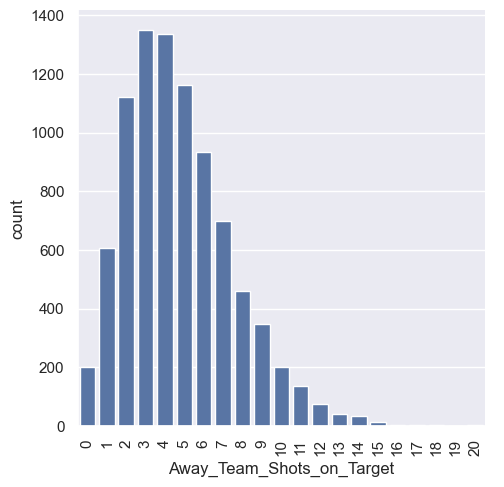

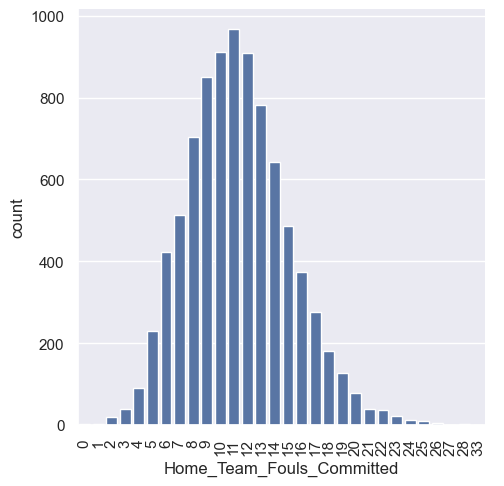

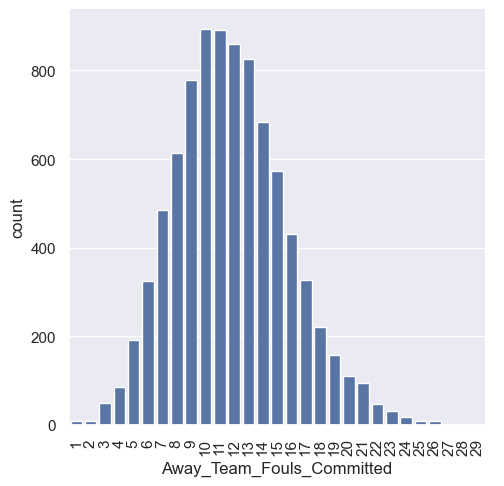

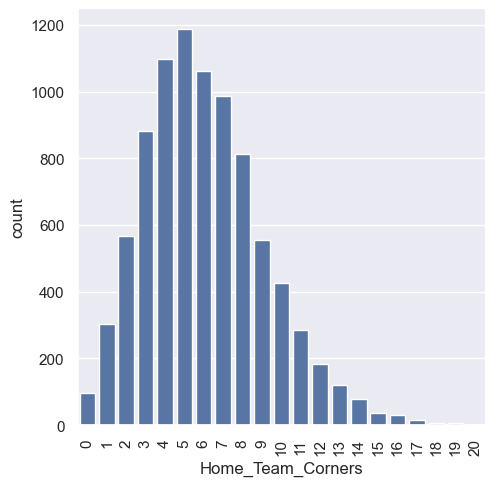

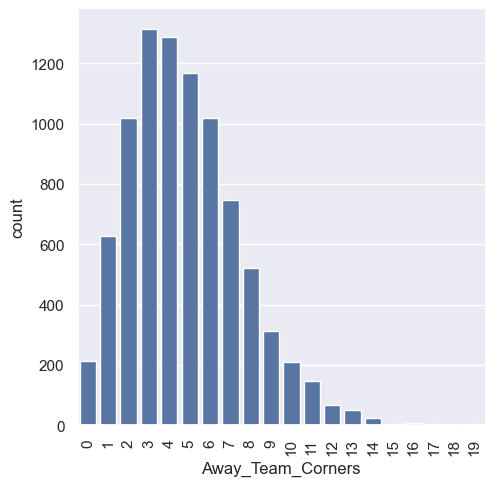

In [217]:
for i in range(10):
  ax = sns.catplot(data=df_clean,x=numerical_attributes[i],kind='count')
  ax.set_xticklabels(rotation=90)

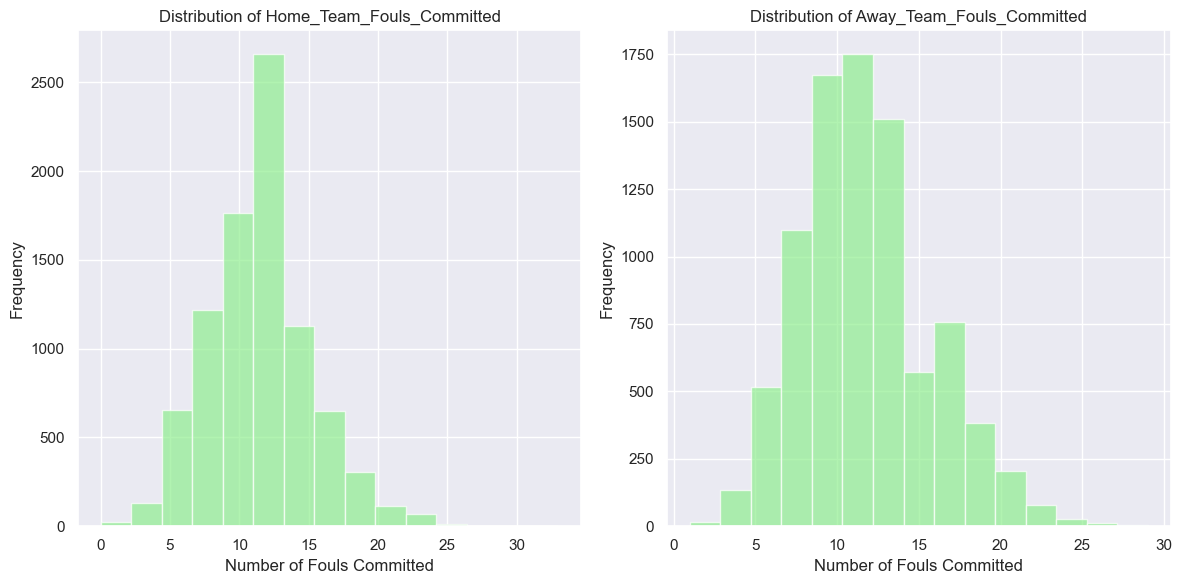

In [218]:
import matplotlib.pyplot as plt

# Define the DataFrame df containing all data

# Select only the attributes for visualization
fouls = ['Home_Team_Fouls_Committed', 'Away_Team_Fouls_Committed']

# Set up subplots for plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.subplots_adjust(wspace=0.4)

# Plot histograms or box plots for home and away team fouls committed
for i, attribute in enumerate(fouls):
    ax = axes[i]
    ax.hist(df_clean[attribute], bins=15, color='lightgreen', alpha=0.7)
    # Alternatively, you can use box plots
    # df.boxplot(column=attribute, ax=ax, color='lightgreen', patch_artist=True)
    ax.set_title(f'Distribution of {attribute}')
    ax.set_xlabel('Number of Fouls Committed')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


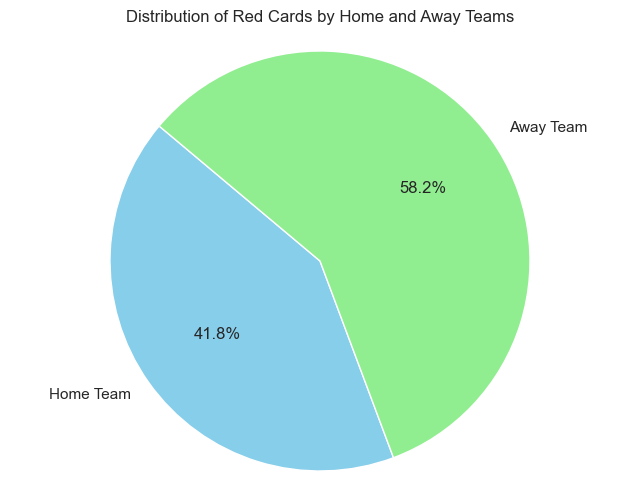

In [219]:
import matplotlib.pyplot as plt

# Calculate total number of yellow cards received by home and away teams
total_yellow_home = df['Home_Team_Red_Cards'].sum()
total_yellow_away = df['Away_Team_Red_Cards'].sum()

# Create labels and values for the pie chart
labels = ['Home Team', 'Away Team']
values = [total_yellow_home, total_yellow_away]

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Distribution of Red Cards by Home and Away Teams')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

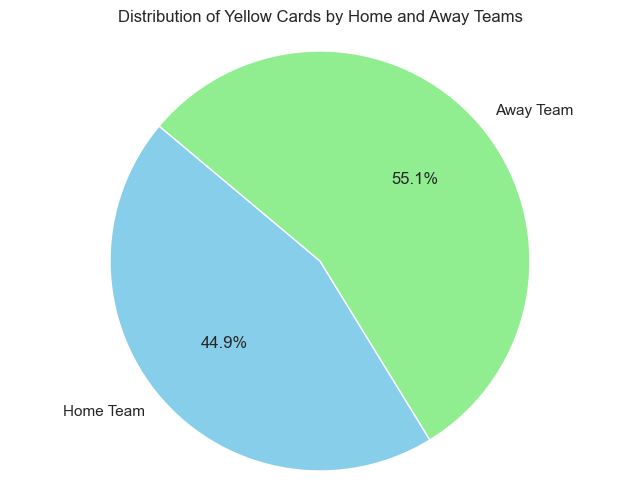

In [220]:
import matplotlib.pyplot as plt

# Calculate total number of yellow cards received by home and away teams
total_yellow_home = df_clean['Home_Team_Yellow_Cards'].sum()
total_yellow_away = df_clean['Away_Team_Yellow_Cards'].sum()

# Create labels and values for the pie chart
labels = ['Home Team', 'Away Team']
values = [total_yellow_home, total_yellow_away]

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Distribution of Yellow Cards by Home and Away Teams')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



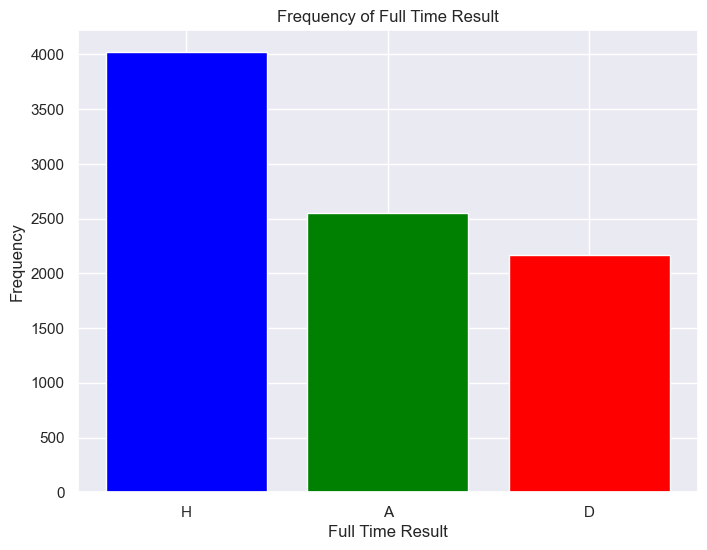

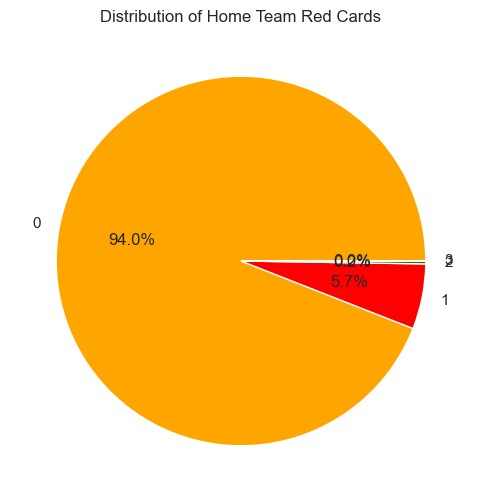

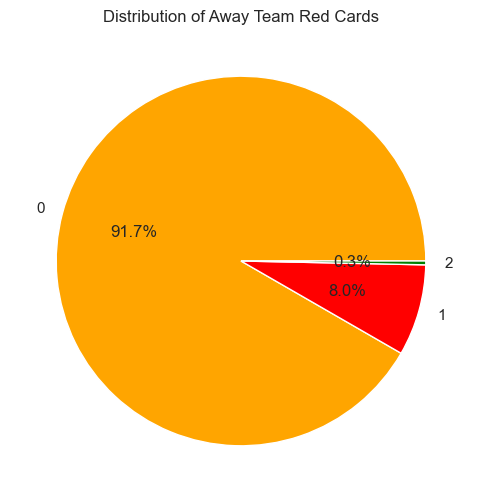

In [221]:
import matplotlib.pyplot as plt

# Data
full_time_result_counts = df_clean['Full_Time_Result'].value_counts()
home_red_cards_counts = df_clean['Home_Team_Red_Cards'].value_counts()
away_red_cards_counts = df_clean['Away_Team_Red_Cards'].value_counts()

# Bar plot for Full Time Result
plt.figure(figsize=(8, 6))
plt.bar(full_time_result_counts.index, full_time_result_counts.values, color=['blue', 'green', 'red'])
plt.xlabel('Full Time Result')
plt.ylabel('Frequency')
plt.title('Frequency of Full Time Result')
plt.show()

# Pie chart for Home Team Red Cards
plt.figure(figsize=(8, 6))
plt.pie(home_red_cards_counts, labels=home_red_cards_counts.index, autopct='%1.1f%%', colors=['orange', 'red', 'green'])
plt.title('Distribution of Home Team Red Cards')
plt.show()

# Pie chart for Away Team Red Cards
plt.figure(figsize=(8, 6))
plt.pie(away_red_cards_counts, labels=away_red_cards_counts.index, autopct='%1.1f%%', colors=['orange', 'red', 'green'])
plt.title('Distribution of Away Team Red Cards')
plt.show()


## Feature Engineering

Now, I will perform Feature Engineering in order.
1. Data Splitting: training set and testing set
2. Data Normalization (involve numerical variable)
3. balance / imbalance: use smote to balance (balance the target variable only)
4. impute: to handle null values (not required in this project because we dont have any null values)
5. timestamp: to handle time value (not required in this project because we dont have any time values) 

In [222]:
df_clean_encode = df_clean.copy()

In [223]:
print(df_clean_encode)

      Full_Time_Home_Team_Goals  Full_Time_Away_Team_Goals Full_Time_Result  \
0                             4                          0                H   
1                             4                          2                H   
2                             1                          3                A   
3                             2                          2                D   
4                             2                          0                H   
...                         ...                        ...              ...   
8734                          1                          0                H   
8735                          1                          4                A   
8736                          2                          1                H   
8737                          2                          1                H   
8738                          4                          4                D   

      Half_Time_Home_Team_Goals  Half_Time_Away_Tea

In [224]:
# Check for missing values in df_clean_encode
missing_values = df_clean_encode.isnull().sum()

# Print the number of missing values for each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Full_Time_Home_Team_Goals    0
Full_Time_Away_Team_Goals    0
Full_Time_Result             0
Half_Time_Home_Team_Goals    0
Half_Time_Away_Team_Goals    0
Half_Time_Result             0
Home_Team_Shots              0
Away_Team_Shots              0
Home_Team_Shots_on_Target    0
Away_Team_Shots_on_Target    0
Home_Team_Corners            0
Away_Team_Corners            0
Home_Team_Fouls_Committed    0
Away_Team_Fouls_Committed    0
Home_Team_Yellow_Cards       0
Away_Team_Yellow_Cards       0
Home_Team_Red_Cards          0
Away_Team_Red_Cards          0
dtype: int64


In [225]:
print(df_clean_encode)

      Full_Time_Home_Team_Goals  Full_Time_Away_Team_Goals Full_Time_Result  \
0                             4                          0                H   
1                             4                          2                H   
2                             1                          3                A   
3                             2                          2                D   
4                             2                          0                H   
...                         ...                        ...              ...   
8734                          1                          0                H   
8735                          1                          4                A   
8736                          2                          1                H   
8737                          2                          1                H   
8738                          4                          4                D   

      Half_Time_Home_Team_Goals  Half_Time_Away_Tea

### Encoding Data

In [226]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode Full_Time_Result column-----------------------------------------------------------------------------------
df_clean_encode['Full_Time_Result_LabelEncoded'] = label_encoder.fit_transform(df_clean_encode['Full_Time_Result'])

# Print the mapping of encoded labels to original categories
print("Encoded Labels Mapping:")
for label, category in enumerate(label_encoder.classes_):
    print(f"{category}: {label}")


Encoded Labels Mapping:
A: 0
D: 1
H: 2


In [227]:
# Encode Half_Time_Result column-----------------------------------------------------------------------------------
df_clean_encode['Half_Time_Result_LabelEncoded'] = label_encoder.fit_transform(df_clean_encode['Half_Time_Result'])

# Print the mapping of encoded labels to original categories
print("Encoded Labels Mapping:")
for label, category in enumerate(label_encoder.classes_):
    print(f"{category}: {label}")

Encoded Labels Mapping:
A: 0
D: 1
H: 2


In [228]:
# Check for missing values in df_clean_encode
missing_values = df_clean_encode.isnull().sum()

# Print the number of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Full_Time_Home_Team_Goals        0
Full_Time_Away_Team_Goals        0
Full_Time_Result                 0
Half_Time_Home_Team_Goals        0
Half_Time_Away_Team_Goals        0
Half_Time_Result                 0
Home_Team_Shots                  0
Away_Team_Shots                  0
Home_Team_Shots_on_Target        0
Away_Team_Shots_on_Target        0
Home_Team_Corners                0
Away_Team_Corners                0
Home_Team_Fouls_Committed        0
Away_Team_Fouls_Committed        0
Home_Team_Yellow_Cards           0
Away_Team_Yellow_Cards           0
Home_Team_Red_Cards              0
Away_Team_Red_Cards              0
Full_Time_Result_LabelEncoded    0
Half_Time_Result_LabelEncoded    0
dtype: int64


In [229]:
# Print the updated DataFrame with label encoded columns
print("Updated DataFrame with label encoded columns:")
print(df_clean_encode)

Updated DataFrame with label encoded columns:
      Full_Time_Home_Team_Goals  Full_Time_Away_Team_Goals Full_Time_Result  \
0                             4                          0                H   
1                             4                          2                H   
2                             1                          3                A   
3                             2                          2                D   
4                             2                          0                H   
...                         ...                        ...              ...   
8734                          1                          0                H   
8735                          1                          4                A   
8736                          2                          1                H   
8737                          2                          1                H   
8738                          4                          4                D   

     

In [230]:
#save cleaned dataset to csv file
#read combined data
#df_clean_encode.to_csv('BEFORE DONE_CLEANED_EPL_all15seasons.csv', index=False) #new dataframe (after cleaning part 2)

In [231]:

# Drop the 'Full_Time_Result' and 'Half_Time_Result' columns
df_clean_encode.drop(['Full_Time_Result', 'Half_Time_Result'], axis=1, inplace=True)

# Print the updated DataFrame
print("Updated DataFrame after dropping 'Full_Time_Result' and 'Half_Time_Result' columns:")
print(df_clean_encode)


Updated DataFrame after dropping 'Full_Time_Result' and 'Half_Time_Result' columns:
      Full_Time_Home_Team_Goals  Full_Time_Away_Team_Goals  \
0                             4                          0   
1                             4                          2   
2                             1                          3   
3                             2                          2   
4                             2                          0   
...                         ...                        ...   
8734                          1                          0   
8735                          1                          4   
8736                          2                          1   
8737                          2                          1   
8738                          4                          4   

      Half_Time_Home_Team_Goals  Half_Time_Away_Team_Goals  Home_Team_Shots  \
0                             2                          0               17   
1            

In [232]:
print(df_clean_encode.dtypes)

Full_Time_Home_Team_Goals        int32
Full_Time_Away_Team_Goals        int32
Half_Time_Home_Team_Goals        int32
Half_Time_Away_Team_Goals        int32
Home_Team_Shots                  int32
Away_Team_Shots                  int32
Home_Team_Shots_on_Target        int32
Away_Team_Shots_on_Target        int32
Home_Team_Corners                int32
Away_Team_Corners                int32
Home_Team_Fouls_Committed        int32
Away_Team_Fouls_Committed        int32
Home_Team_Yellow_Cards           int32
Away_Team_Yellow_Cards           int32
Home_Team_Red_Cards              int32
Away_Team_Red_Cards              int32
Full_Time_Result_LabelEncoded    int32
Half_Time_Result_LabelEncoded    int32
dtype: object


In [233]:
# MODIFY HERE
numerical_attributes = [
    'Full_Time_Home_Team_Goals', 'Full_Time_Away_Team_Goals',
    'Half_Time_Home_Team_Goals', 'Half_Time_Away_Team_Goals',
    'Home_Team_Shots', 'Away_Team_Shots',
    'Home_Team_Shots_on_Target', 'Away_Team_Shots_on_Target',
    'Home_Team_Corners', 'Away_Team_Corners',
    'Home_Team_Fouls_Committed', 'Away_Team_Fouls_Committed',
    'Home_Team_Yellow_Cards', 'Away_Team_Yellow_Cards',
    'Home_Team_Red_Cards', 'Away_Team_Red_Cards',
    'Half_Time_Result_LabelEncoded'
]

# Convert numerical attributes to float
for attr in numerical_attributes:
    df_clean_encode[attr] = df_clean_encode[attr].astype(float)

# Check the data types of numerical attributes after conversion
numerical_attributes_dtypes = df_clean_encode[numerical_attributes].dtypes
print("Numerical Attributes Data Types after Conversion:")
print(numerical_attributes_dtypes)

Numerical Attributes Data Types after Conversion:
Full_Time_Home_Team_Goals        float64
Full_Time_Away_Team_Goals        float64
Half_Time_Home_Team_Goals        float64
Half_Time_Away_Team_Goals        float64
Home_Team_Shots                  float64
Away_Team_Shots                  float64
Home_Team_Shots_on_Target        float64
Away_Team_Shots_on_Target        float64
Home_Team_Corners                float64
Away_Team_Corners                float64
Home_Team_Fouls_Committed        float64
Away_Team_Fouls_Committed        float64
Home_Team_Yellow_Cards           float64
Away_Team_Yellow_Cards           float64
Home_Team_Red_Cards              float64
Away_Team_Red_Cards              float64
Half_Time_Result_LabelEncoded    float64
dtype: object


### Correlation Matrix

This project uses correlation matrix To identify features that are strongly related to the target variable and to detect features that are highly related to each other (multicollinearity).

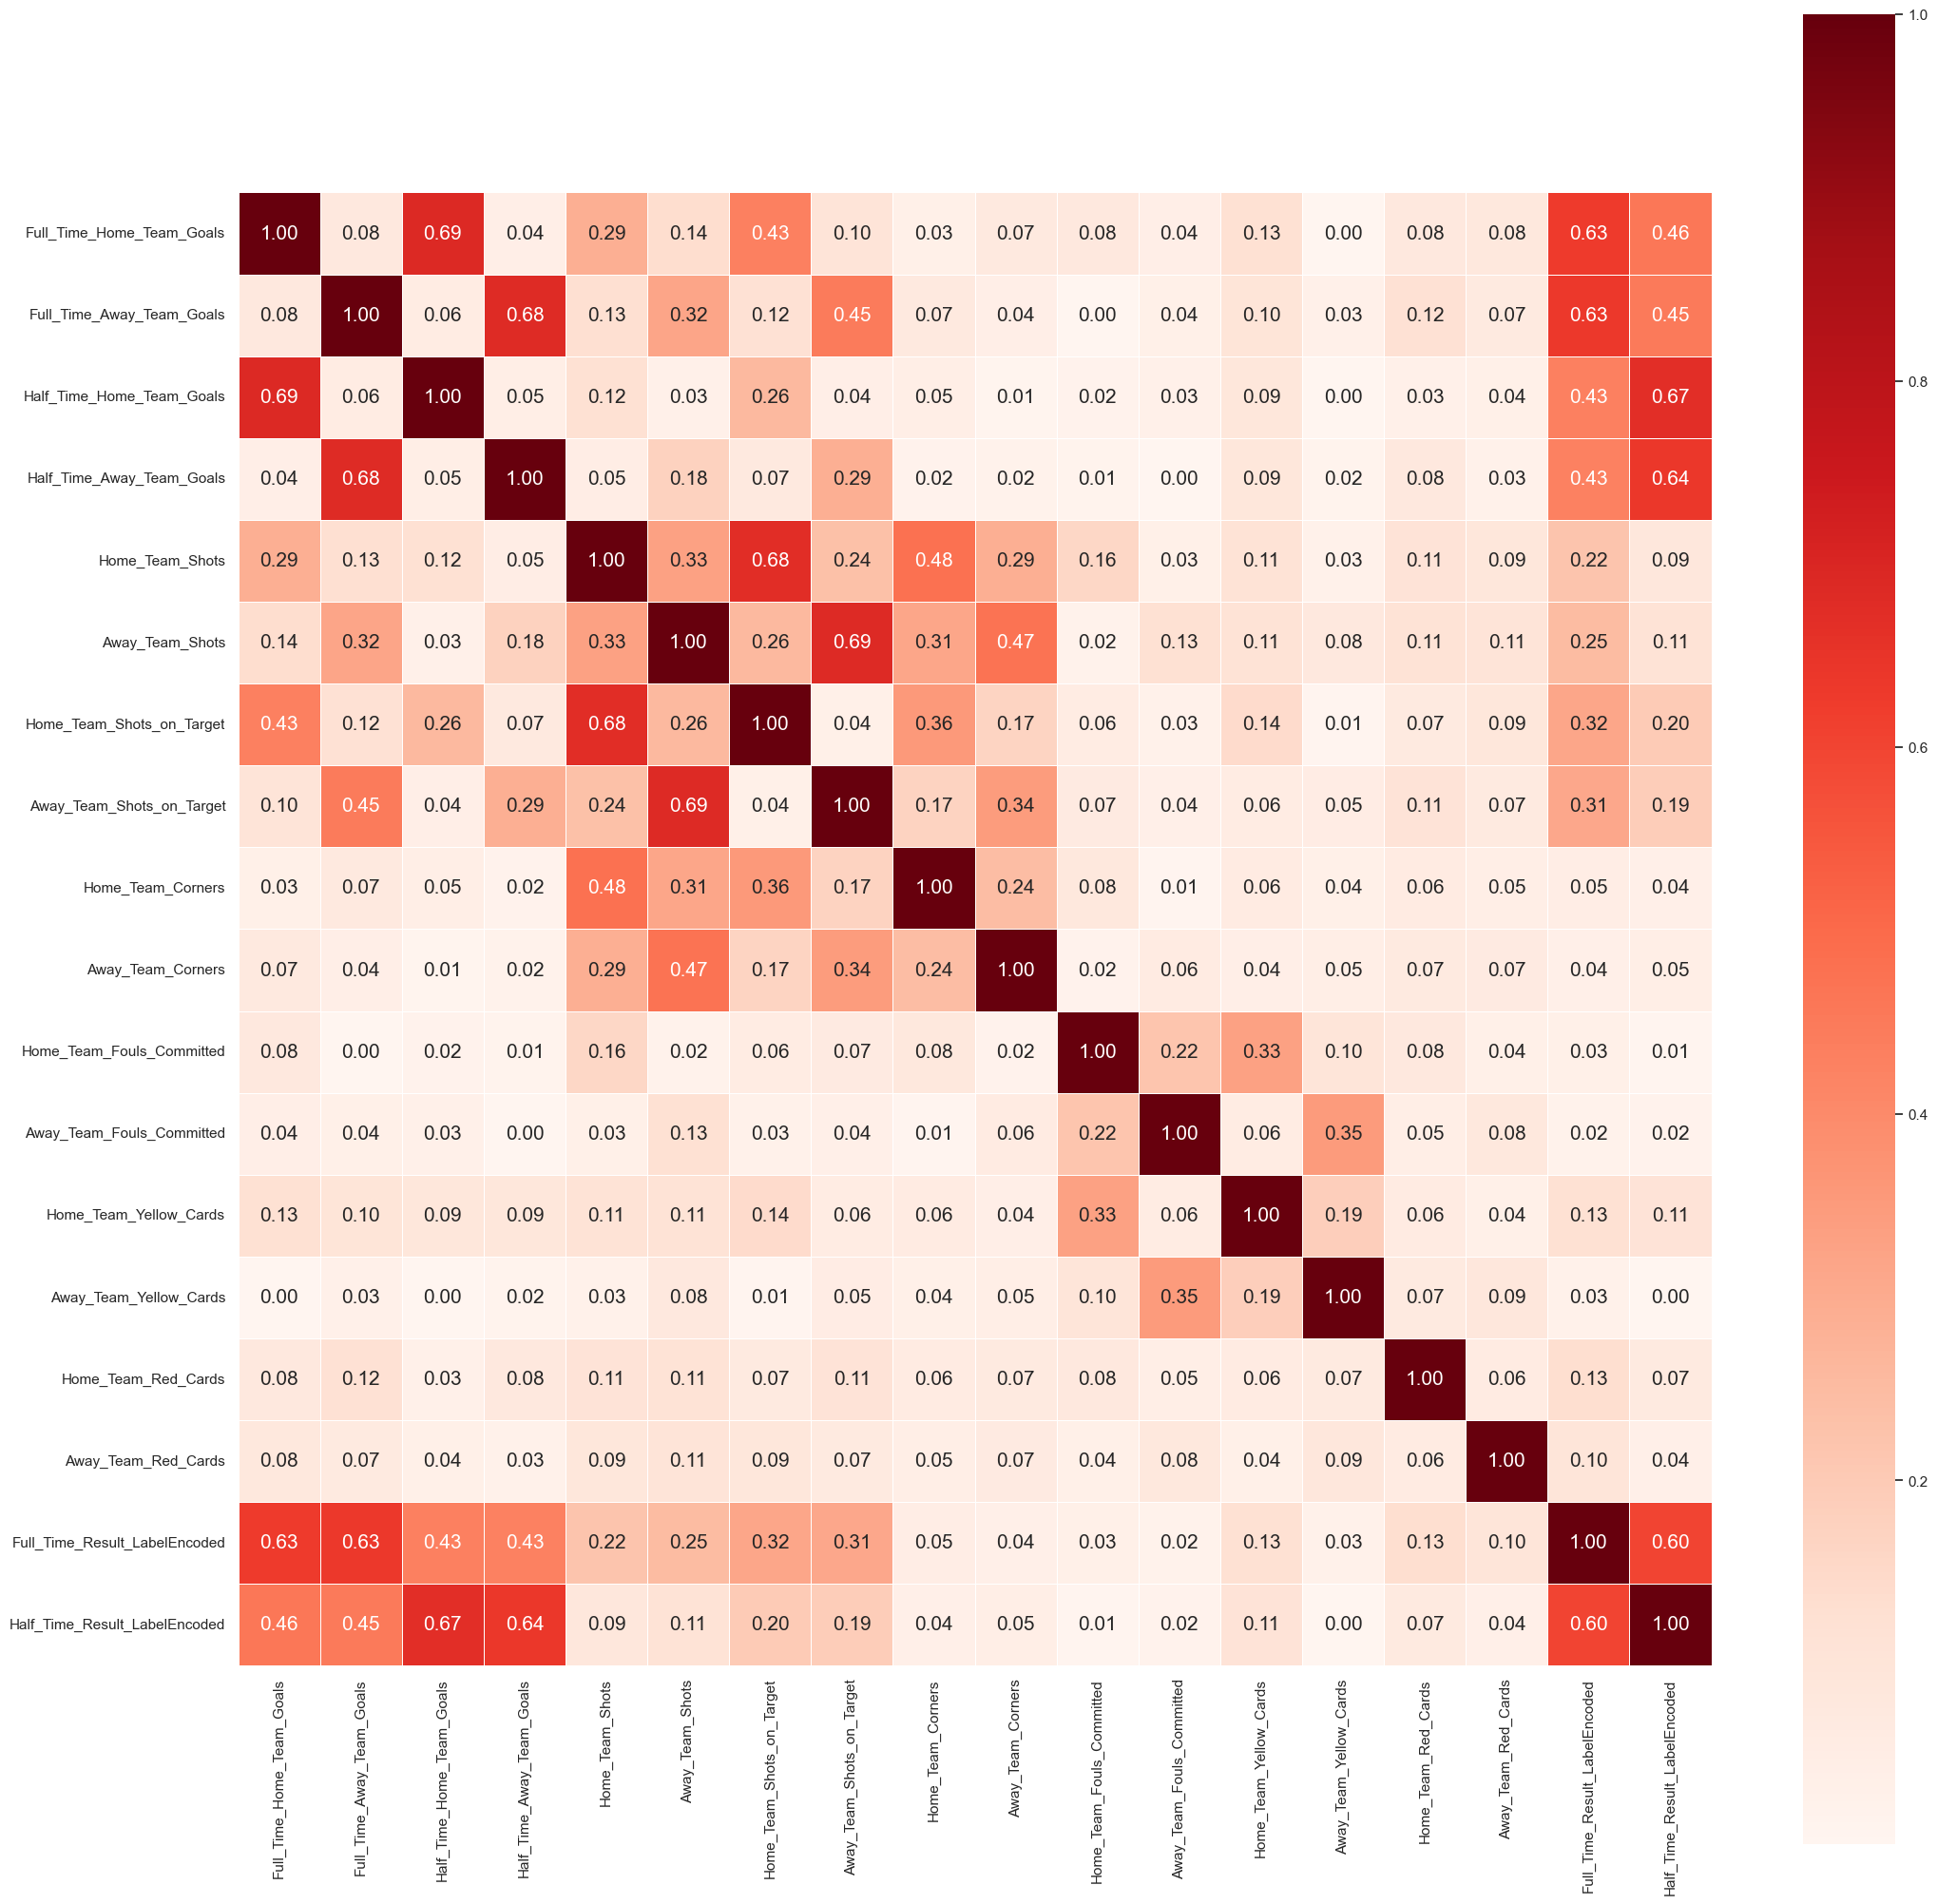

In [234]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_clean_encode.corr().abs()

plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, fmt='.2f', annot_kws={'size': 15}, cmap='Reds', linewidths=.5)
plt.show()

### Feature Selection

In this phase, I choose features that are highly correlated to the target variable : (Full_Time_Result_LabelEncoded)

In [235]:
df_clean_encode.dtypes

Full_Time_Home_Team_Goals        float64
Full_Time_Away_Team_Goals        float64
Half_Time_Home_Team_Goals        float64
Half_Time_Away_Team_Goals        float64
Home_Team_Shots                  float64
Away_Team_Shots                  float64
Home_Team_Shots_on_Target        float64
Away_Team_Shots_on_Target        float64
Home_Team_Corners                float64
Away_Team_Corners                float64
Home_Team_Fouls_Committed        float64
Away_Team_Fouls_Committed        float64
Home_Team_Yellow_Cards           float64
Away_Team_Yellow_Cards           float64
Home_Team_Red_Cards              float64
Away_Team_Red_Cards              float64
Full_Time_Result_LabelEncoded      int32
Half_Time_Result_LabelEncoded    float64
dtype: object

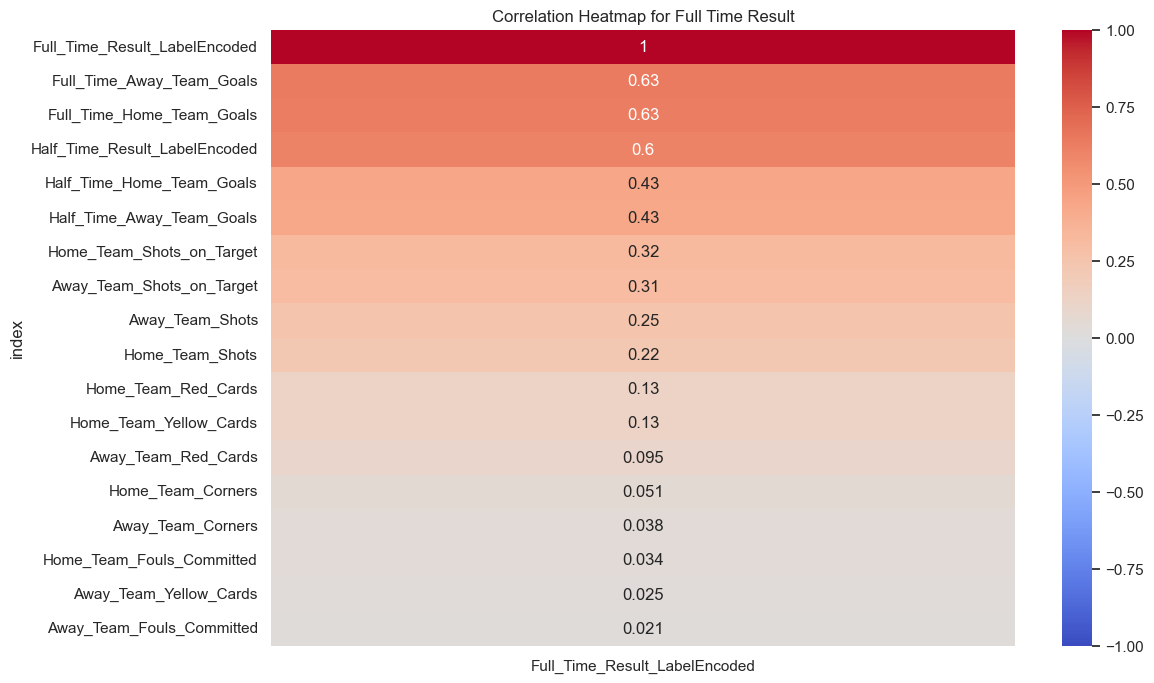

In [236]:
correlations = df_clean_encode.corr()
target_correlations = correlations['Full_Time_Result_LabelEncoded'].abs()

sorted_target = target_correlations.to_frame().reset_index()
sorted_corr = sorted_target.sort_values(by='Full_Time_Result_LabelEncoded', ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(sorted_corr.set_index('index'), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Full Time Result")
plt.show()

Because Home_Team_Corners, Away_Team_Corners, Home_Team_Fouls_Commited, Away_Team_Yellow_Cards and Away_Team_Fouls_Commited has low correlation to Full Time Result (Full_Time_Result_LabelEncoded), we will not be using them as features for training and testing.

In [237]:
N = 18  # Number of top features to select
top_features = target_correlations.nlargest(N).index
X_selected = df_clean_encode[top_features]

# Print the names of the selected features
print(top_features)

Index(['Full_Time_Result_LabelEncoded', 'Full_Time_Away_Team_Goals',
       'Full_Time_Home_Team_Goals', 'Half_Time_Result_LabelEncoded',
       'Half_Time_Home_Team_Goals', 'Half_Time_Away_Team_Goals',
       'Home_Team_Shots_on_Target', 'Away_Team_Shots_on_Target',
       'Away_Team_Shots', 'Home_Team_Shots', 'Home_Team_Red_Cards',
       'Home_Team_Yellow_Cards', 'Away_Team_Red_Cards', 'Home_Team_Corners',
       'Away_Team_Corners', 'Home_Team_Fouls_Committed',
       'Away_Team_Yellow_Cards', 'Away_Team_Fouls_Committed'],
      dtype='object')


In [238]:
features = [ 'Half_Time_Result_LabelEncoded',
       'Half_Time_Home_Team_Goals', 'Half_Time_Away_Team_Goals',
       'Home_Team_Shots_on_Target', 'Away_Team_Shots_on_Target',
       'Away_Team_Shots', 'Home_Team_Shots', 'Home_Team_Red_Cards',
       'Home_Team_Yellow_Cards', 'Away_Team_Red_Cards']
#'Full_Time_Away_Team_Goals',
  #     'Full_Time_Home_Team_Goals'
target = 'Full_Time_Result_LabelEncoded'

In [239]:
# Create a new DataFrame with selected features and target
final_data = df_clean_encode[features + [target]]

# Save to CSV
final_data.to_csv('FINAL_CLEANED_EPL_DATA_TEST.csv', index=False)

### Data Splitting : train set and test set

In [240]:
# Feature Engineering (1)--------------------------------------------------------------------------------------------------------
# split dataset : train set and test set
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#Full_Time_Result_LabelEncoded = target
X = df_clean_encode[features]
y = df_clean_encode[target]
#X = df_clean_encode.loc[:, df_clean_encode.columns != 'Full_Time_Result_LabelEncoded']
#y = df_clean_encode.loc[:, df_clean_encode.columns == 'Full_Time_Result_LabelEncoded'] 
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0, stratify=y)

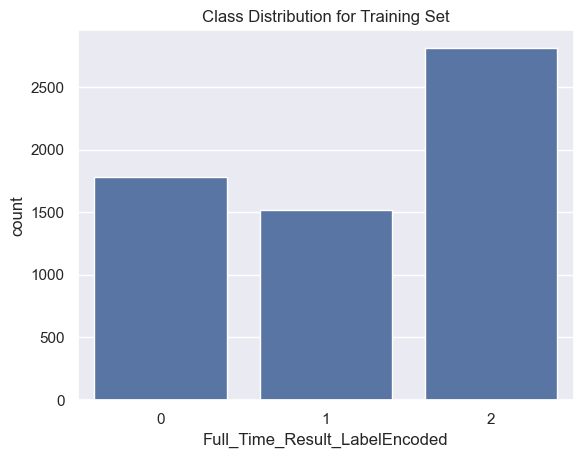

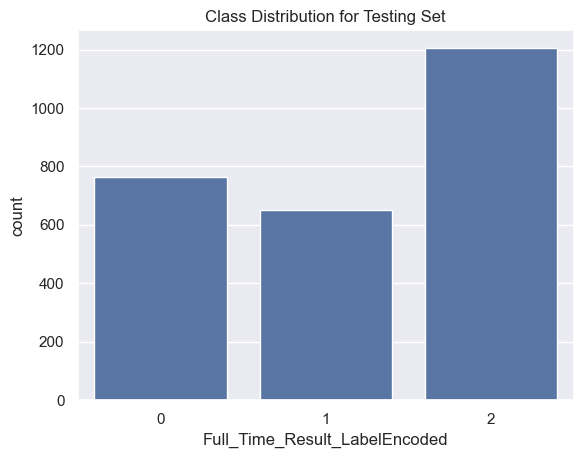

In [241]:
#visualize classes after splitting
plt.figure()
sns.countplot(x='Full_Time_Result_LabelEncoded', data = pd.DataFrame({'Full_Time_Result_LabelEncoded':y_train}))
plt.title('Class Distribution for Training Set')
plt.show()
plt.figure()
sns.countplot(x='Full_Time_Result_LabelEncoded', data = pd.DataFrame({'Full_Time_Result_LabelEncoded':y_test}))
plt.title('Class Distribution for Testing Set')
plt.show()
#Encoded Labels Mapping:
#A: 0 (FULL TIME RESULT : AWAY TEAM IS THE WINNER)
#D: 1 (FULL TIME RESULT : RESULT IS DRAW)
#H: 2 (FULL TIME RESULT : HOME TEAM IS THE WINNER)

In [242]:
# Check class distribution
print("Training set class distribution:\n", pd.Series(y_train).value_counts())
print("Test set class distribution:\n", pd.Series(y_test).value_counts())

Training set class distribution:
 2    2814
0    1783
1    1519
Name: count, dtype: int64
Test set class distribution:
 2    1206
0     764
1     652
Name: count, dtype: int64


In [243]:
!pip install imbalanced-learn
!pip install imblearn

In [244]:
print(X_train)

      Half_Time_Result_LabelEncoded  Half_Time_Home_Team_Goals  \
1629                            1.0                        0.0   
607                             0.0                        0.0   
6818                            2.0                        2.0   
3745                            1.0                        1.0   
3741                            2.0                        2.0   
...                             ...                        ...   
6815                            1.0                        0.0   
1033                            0.0                        0.0   
1256                            2.0                        3.0   
3010                            2.0                        2.0   
6214                            2.0                        2.0   

      Half_Time_Away_Team_Goals  Home_Team_Shots_on_Target  \
1629                        0.0                        3.0   
607                         2.0                        5.0   
6818                 

### Normalize Features 

In [245]:
# Feature Engineering (2)--------------------------------------------------------------------------------------------------------
# Normalize features
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train[features] = min_max_scaler.fit_transform(X_train[features])
print(X_train)

      Half_Time_Result_LabelEncoded  Half_Time_Home_Team_Goals  \
1629                            0.5                        0.0   
607                             0.0                        0.0   
6818                            1.0                        0.4   
3745                            0.5                        0.2   
3741                            1.0                        0.4   
...                             ...                        ...   
6815                            0.5                        0.0   
1033                            0.0                        0.0   
1256                            1.0                        0.6   
3010                            1.0                        0.4   
6214                            1.0                        0.4   

      Half_Time_Away_Team_Goals  Home_Team_Shots_on_Target  \
1629                        0.0                   0.136364   
607                         0.4                   0.227273   
6818                 

In [246]:
# Feature Engineering (3)--------------------------------------------------------------------------------------------------------
# SMOTE - data balancing
import imblearn
smt = imblearn.over_sampling.SMOTE(sampling_strategy="auto", random_state=42, k_neighbors=5)
# Fit smote
X_res, y_res = smt.fit_resample(X_train, y_train)

Class distribution after SMOTE:
target
2    2814
0    2814
1    2814
Name: count, dtype: int64


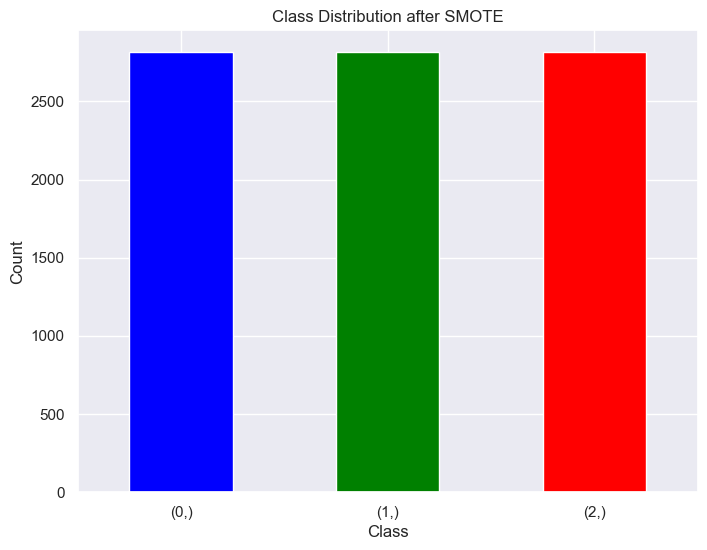

In [247]:
import pandas as pd
import numpy as np

y_res_df = pd.DataFrame(y_res, columns=['target'])

# Print the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_res_df['target'].value_counts())

# Plot the class distribution
plt.figure(figsize=(8, 6))
y_res_df.value_counts().plot(kind="bar", color=['blue', 'green', 'red'])  # Assuming three classes
plt.title("Class Distribution after SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


# Predictive Model Construction

## Logistic Regression

This is to check performance on training set after applying SMOTE:

In [248]:
#to begin logistic regression model analysis,----------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

# Reshape y_res to a 1-dimensional array
y_res = np.ravel(y_res)

logreg = LogisticRegression(solver='lbfgs',max_iter=1000) #initialize logistic regression model

#Train model
logreg.fit(X_res, y_res) 
#check performance on training set (after applying SMOTE)
print('Training accuracy Before Tuning : ', logreg.score(X_res,y_res)) #TRAINING ACCURACY BEFORE TUNING
print('Testing accuracy Before Tuning: ', logreg.score(X_test,y_test)) #TESTING ACCURACY BEFORE TUNING

Training accuracy Before Tuning :  0.6139540393271736
Testing accuracy Before Tuning:  0.6086956521739131


In [249]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5,1] ,
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],  
}

# Perform GridSearchCV
logistic_grid = GridSearchCV(logreg, param_grid, cv=5)
logistic_grid.fit(X_res, y_res)

# Get the results from GridSearchCV
results = logistic_grid.cv_results_

# Extract parameters and scores
param_C = results['param_C'].data.astype(float)
param_solver = results['param_solver'].data.astype(str)
mean_test_scores = results['mean_test_score']

# Print detailed results in the notebook output
results = pd.DataFrame(logistic_grid.cv_results_)
print(results[['param_C', 'param_solver', 'mean_test_score', 'std_test_score']])


   param_C param_solver  mean_test_score  std_test_score
0    0.001    liblinear         0.523573        0.002258
1    0.001        lbfgs         0.607676        0.008881
2    0.001          sag         0.607795        0.008680
3    0.001         saga         0.607676        0.008881
4     0.01    liblinear         0.598437        0.004866
5     0.01        lbfgs         0.608033        0.010683
6     0.01          sag         0.608033        0.010683
7     0.01         saga         0.608033        0.010683
8      0.1    liblinear         0.605782        0.007704
9      0.1        lbfgs         0.611467        0.008571
10     0.1          sag         0.611467        0.008571
11     0.1         saga         0.611467        0.008571
12     0.5    liblinear         0.605663        0.007848
13     0.5        lbfgs         0.611350        0.008890
14     0.5          sag         0.611350        0.008890
15     0.5         saga         0.611350        0.008890
16       1    liblinear        

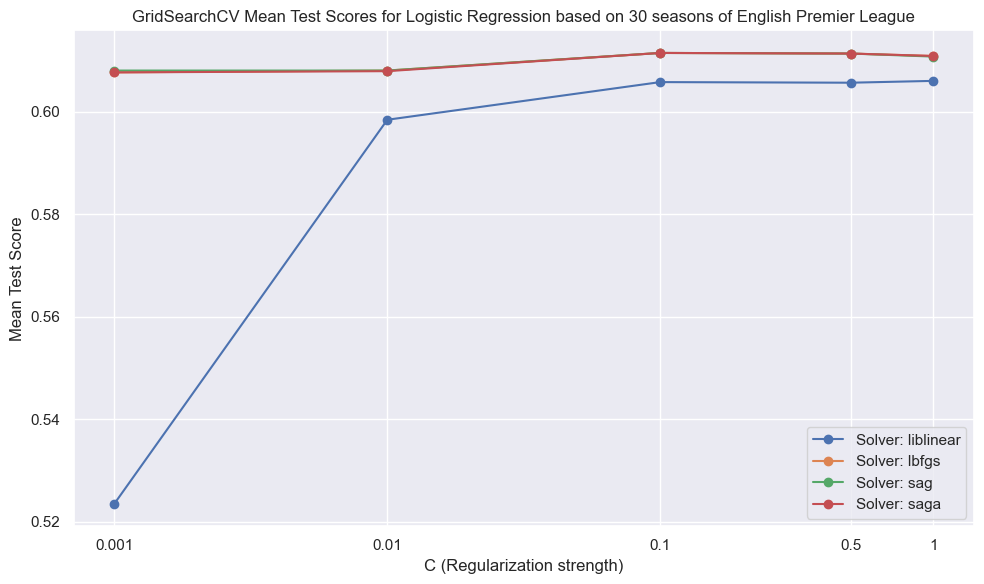

In [250]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your GridSearchCV results
param_C = [0.001, 0.01, 0.1, 0.5, 1]
param_solver = ['liblinear', 'lbfgs', 'sag', 'saga']
mean_test_scores = np.array([
    [0.523573, 0.607676, 0.608032, 0.607676],
    [0.598437, 0.608033, 0.608033, 0.607914],
    [0.605782, 0.611467, 0.611467, 0.611467],
    [0.605663, 0.611350, 0.611350, 0.611350],
    [0.606019, 0.610875, 0.610757, 0.610875]
])
# Plotting the results
plt.figure(figsize=(10, 6))

for i, solver in enumerate(param_solver):
    plt.plot(param_C, mean_test_scores[:, i], marker='o', label=f'Solver: {solver}')

plt.xscale('log')  # Log scale for better visualization of C values
plt.xlabel('C (Regularization strength)')
plt.ylabel('Mean Test Score')
plt.title('GridSearchCV Mean Test Scores for Logistic Regression based on 30 seasons of English Premier League')
plt.xticks(param_C, labels=[str(c) for c in param_C])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Perform Hyperparameter Tuning before Testing

In [251]:
from sklearn.model_selection import GridSearchCV
istic_grid = GridSearchCV(logreg, param_grid, cv=5)
logistic_grid.fit(X_res, y_res)

# Get the best parameters and model
best_params = logistic_grid.best_params_
best_logistic = logistic_grid.best_estimator_
best_logistic.fit(X_res, y_res)

# Check performance on training set after tuning
print('Best hyperparameters found during tuning:' ,best_params)
print('Training accuracy after tuning: ', best_logistic.score(X_res, y_res))  #TRAINING ACCURACY AFTER TUNING

Best hyperparameters found during tuning: {'C': 0.1, 'solver': 'saga'}
Training accuracy after tuning:  0.6101634683724236


Predict on the Test Set using Best LR Model

In [252]:
# Predict on the test set using the best logistic regression model
y_pred_lr = best_logistic.predict(X_test) 

# Print the predictions
print("Predictions on the test set after tuning:", y_pred_lr) 

Predictions on the test set after tuning: [2 2 2 ... 0 2 2]


In [253]:
y_test = y_test.ravel()

Then, Evaluate Model

In [254]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy of the logistic regression model on the test set.
testing_accuracy = accuracy_score(y_test, y_pred_lr)#TESTING ACCURACY AFTER TUNING
 
# Calculate precision, recall, and F1-score for the test set
testing_precision = precision_score(y_test, y_pred_lr, average='weighted')
testing_recall = recall_score(y_test, y_pred_lr, average='weighted')
testing_f1_score = f1_score(y_test, y_pred_lr, average='weighted')

# Print evaluation metrics for the testing set
print("Logistic Regression Evaluation Scores (Testing Set):")
print(f"Accuracy: {testing_accuracy:.4f}")
print(f"Precision: {testing_precision:.4f}")
print(f"Recall: {testing_recall:.4f}")
print(f"F1-score: {testing_f1_score:.4f}")


Logistic Regression Evaluation Scores (Testing Set):
Accuracy: 0.5812
Precision: 0.5428
Recall: 0.5812
F1-score: 0.5048


Logistic Regression Model Evaluation

Logistic Regression Heatmap

[[558   6 200]
 [290   7 355]
 [243   4 959]]


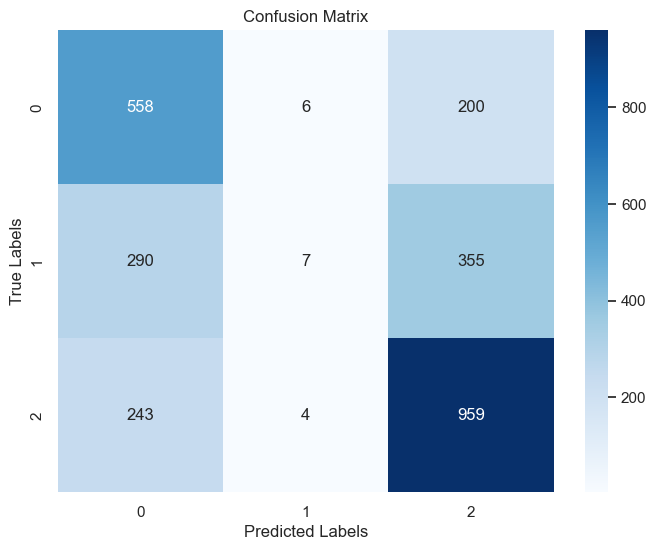

In [256]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Finally, Logistic Regression Testing and Training Set Comparison

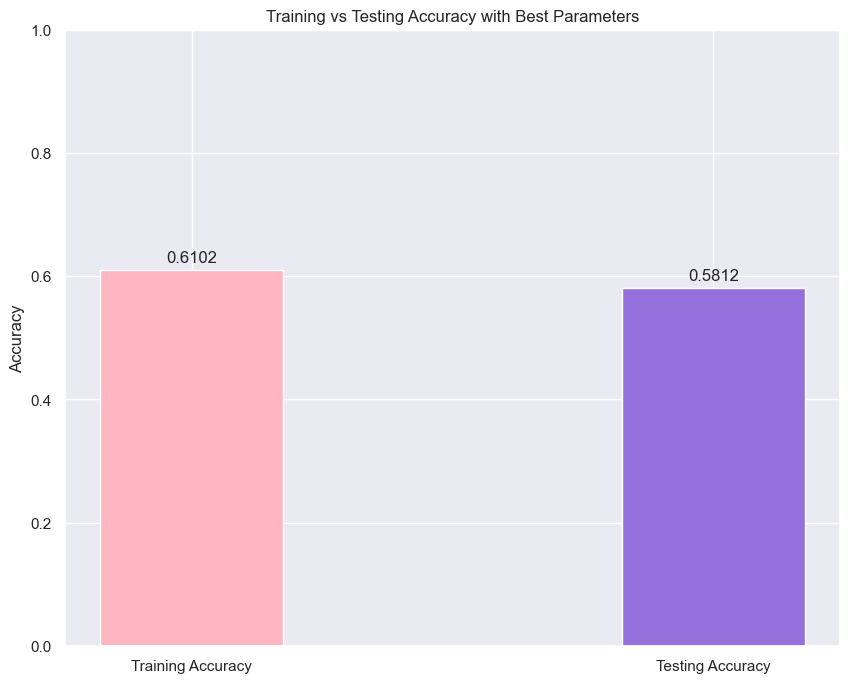

In [257]:
import matplotlib.pyplot as plt
import numpy as np

# Data
training_accuracy_best_param = best_logistic.score(X_res, y_res)
testing_accuracy_best_param = accuracy_score(y_test, y_pred_lr)

# Colors
colors = ['lightpink', 'mediumpurple']

# Labels
labels = ['Training Accuracy', 'Testing Accuracy']
values = [training_accuracy_best_param, testing_accuracy_best_param]

# Plot
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axes here
bars = ax.bar(x, values, width, color=colors)

# Add labels, title, and legend
ax.set_ylabel('Accuracy')
ax.set_title('Training vs Testing Accuracy with Best Parameters')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)  # Set y-axis limits between 0 and 1

# Add data labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


## Random Forest

Training

In [258]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs =-1, random_state = 42)
rf.fit(X_res,y_res)

# Calculate and print the training accuracy
training_accuracy = rf.score(X_res, y_res)
print(f"Training Accuracy: {training_accuracy:}")

# Calculate and print the test accuracy
test_accuracy = rf.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:}")

Training Accuracy: 0.9956171523335703
Test Accuracy: 0.5980167810831426


To obtain the optimal parameters for the training set, the outcomes of the grid search optimization, highlighting the best parameters, are provided below.

Tuning

In [259]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Initialize Random Forest classifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 20, 30,40,50,60,70],
    'max_depth': [None, 10, 20, 30,40,50,60,70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_res, y_res)

# Get the results from GridSearchCV
results = grid_search.cv_results_

# Create a DataFrame of results
results_df = pd.DataFrame(results)

# Sort results by mean_test_score in descending order
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Print top 5 results
print("Top 5 Results:")
for i in range(5):
    result = results_df.iloc[i]
    print(f"Rank {i+1}:")
    print(result[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score']])
    print()
    
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the training set
res_predictions = best_model.predict(X_res)
training_accuracy_RF = accuracy_score(res_predictions, y_res)

print("Best Parameters:", best_params)
print("Training Accuracy:", training_accuracy_RF)


Top 5 Results:
Rank 1:
param_n_estimators               60
param_max_depth                  30
param_min_samples_split           2
param_min_samples_leaf            1
mean_test_score            0.723779
std_test_score             0.084543
Name: 194, dtype: object

Rank 2:
param_n_estimators               70
param_max_depth                  30
param_min_samples_split           2
param_min_samples_leaf            1
mean_test_score            0.721529
std_test_score             0.084611
Name: 195, dtype: object

Rank 3:
param_n_estimators               70
param_max_depth                  40
param_min_samples_split           2
param_min_samples_leaf            1
mean_test_score            0.721529
std_test_score             0.082851
Name: 258, dtype: object

Rank 4:
param_n_estimators               70
param_max_depth                None
param_min_samples_split           2
param_min_samples_leaf            1
mean_test_score            0.721529
std_test_score             0.082851
Name: 6, dt

The code below tune the Random Forest Classifier parameters and add some parameters in order to get the best training score for accuracy result.

To make sure model is predicted well and not overfitting or underfitting, code below are used with test set, unseen data to compare with previous training result.

In [260]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

y_res = y_res.ravel()
y_test = y_test.ravel()

# Make predictions on the test set
test_predictions = best_model.predict(X_test)

# Calculate accuracy score on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.5865751334858886


Testing

Confusion Matrix:
[[ 393  113   64]
 [  14    6    3]
 [ 357  533 1139]]


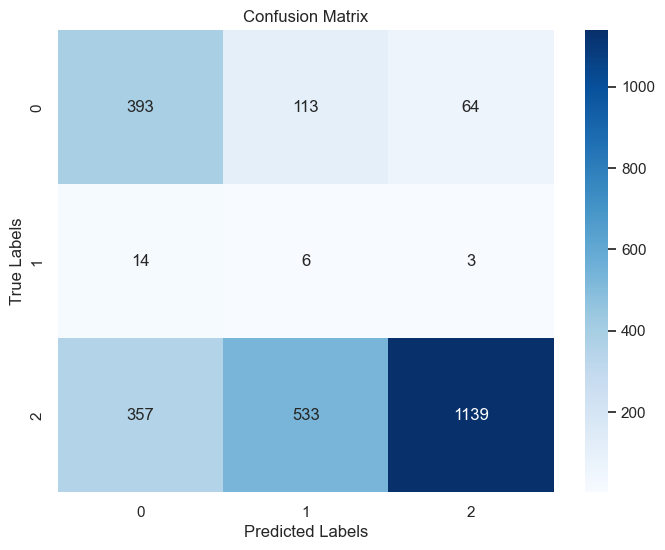

In [261]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
#conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Plot heatmap
#plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
#plt.title("Confusion Matrix")
#plt.xlabel("Predicted Labels")
#plt.ylabel("True Labels")
#plt.show()

from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix1 = confusion_matrix(test_predictions, y_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix1)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [262]:
# Calculate precision, recall, and F1-score on the test set
from sklearn.metrics import classification_report
print("Classification Report on Test Set:")
print(classification_report(test_predictions, y_test))

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.51      0.69      0.59       570
           1       0.01      0.26      0.02        23
           2       0.94      0.56      0.70      2029

    accuracy                           0.59      2622
   macro avg       0.49      0.50      0.44      2622
weighted avg       0.84      0.59      0.67      2622



In [263]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy of the model on the test set
testing_accuracy = accuracy_score(test_predictions, y_test)

# Calculate precision, recall, and F1-score for the test set
testing_precision = precision_score(test_predictions, y_test, average='weighted')
testing_recall = recall_score(test_predictions, y_test, average='weighted')
testing_f1_score = f1_score(test_predictions, y_test, average='weighted')

# Print evaluation metrics for the testing set
print("Random Forest Evaluation Scores (Testing Set):")
print(f"Accuracy: {testing_accuracy:.4f}")
print(f"Precision: {testing_precision:.4f}")
print(f"Recall: {testing_recall:.4f}")
print(f"F1-score: {testing_f1_score:.4f}")

Random Forest Evaluation Scores (Testing Set):
Accuracy: 0.5866
Precision: 0.8428
Recall: 0.5866
F1-score: 0.6732


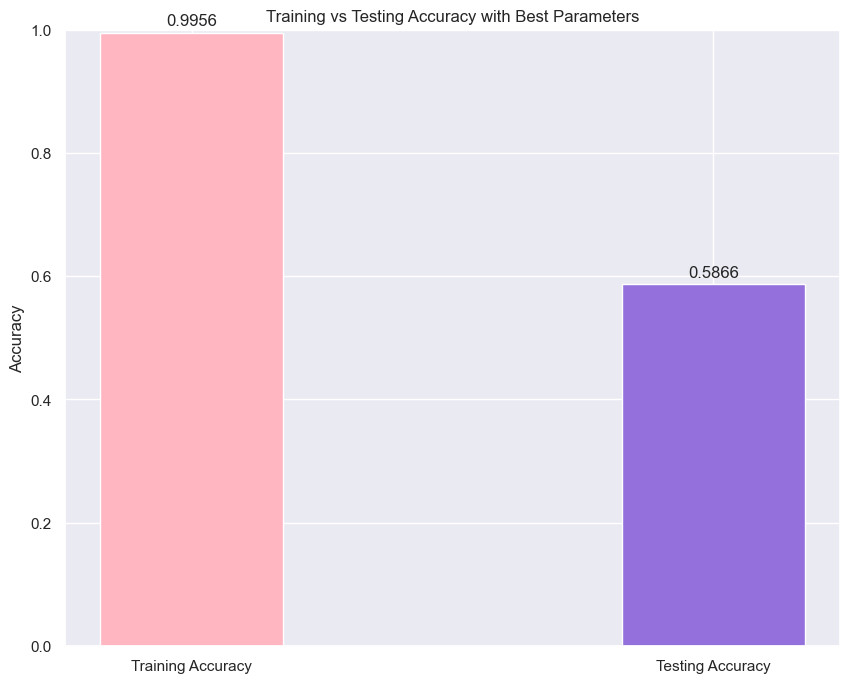

In [264]:
import matplotlib.pyplot as plt
import numpy as np

# Data
training_accuracy_best_param = best_logistic.score(X_res, y_res)
testing_accuracy_best_param = accuracy_score(y_test, y_pred_lr)

# Colors
colors = ['lightpink', 'mediumpurple']

# Labels
labels = ['Training Accuracy', 'Testing Accuracy']
values = [training_accuracy_RF, testing_accuracy ]

# Plot
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axes here
bars = ax.bar(x, values, width, color=colors)

# Add labels, title, and legend
ax.set_ylabel('Accuracy')
ax.set_title('Training vs Testing Accuracy with Best Parameters')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)  # Set y-axis limits between 0 and 1

# Add data labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


## Support Vector Machine

In [265]:
# Import necessary libraries
#Full_Time_Result_LabelEncoded = target
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score,f1_score

In [266]:
# Create a svm Classifier
clf = svm.SVC(kernel='linear', gamma='auto')  # Linear Kernel

# Train the model using the training sets
clf.fit(X_res, y_res)

# Predict the response for training dataset
y_train_pred = clf.predict(X_res)

# Predict the response for test dataset
y_test_pred= clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
train_accuracy_SVM = metrics.accuracy_score(y_res, y_train_pred)
test_accuracy_SVM = metrics.accuracy_score(y_test, y_test_pred)

print("Training Accuracy: ", train_accuracy_SVM)
print("Test Accuracy: ", test_accuracy_SVM)


Training Accuracy:  0.6094527363184079
Test Accuracy:  0.5614035087719298


Hyperparameter Tuning for SVM

In [267]:
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3, cv=5)

# Train the model using the training sets
grid_search.fit(X_res, y_res)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Use the best model to make predictions
best_model = grid_search.best_estimator_

# Predict the response for training dataset
y_train_pred = best_model.predict(X_res)

# Predict the response for test dataset
y_test_pred = best_model.predict(X_test)

# Model Accuracy: how often is the classifier correct?
train_accuracy_SVM = metrics.accuracy_score(y_res, y_train_pred)
test_accuracy_SVM = metrics.accuracy_score(y_test, y_test_pred)

print("Training Accuracy: ", train_accuracy_SVM)
print("Test Accuracy: ", test_accuracy_SVM)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.602 total time=   2.2s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.608 total time=   2.2s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.590 total time=   2.6s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.618 total time=   2.3s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.606 total time=   2.3s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.603 total time=   3.9s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.609 total time=   3.8s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.582 total time=   4.1s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.608 total time=   3.8s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.612 total time=   4.0s
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.602 total time=   2.3s
[CV 2/5] END ..C=0.1, gamma=auto, kernel=linear;

In [268]:
# Calculate precision, recall, and F1-score for the test set
testing_precision = precision_score(y_test, y_test_pred, average='weighted')
testing_recall = recall_score(y_test, y_test_pred, average='weighted')
testing_f1_score = f1_score(y_test, y_test_pred, average='weighted')

# Print evaluation metrics for the testing set
print("\nSVM Evaluation Scores (Testing Set):")
print(f"Accuracy: {test_accuracy_SVM:.4f}")
print(f"Precision: {testing_precision:.4f}")
print(f"Recall: {testing_recall:.4f}")
print(f"F1-score: {testing_f1_score:.4f}")


SVM Evaluation Scores (Testing Set):
Accuracy: 0.4600
Precision: 0.2116
Recall: 0.4600
F1-score: 0.2898


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


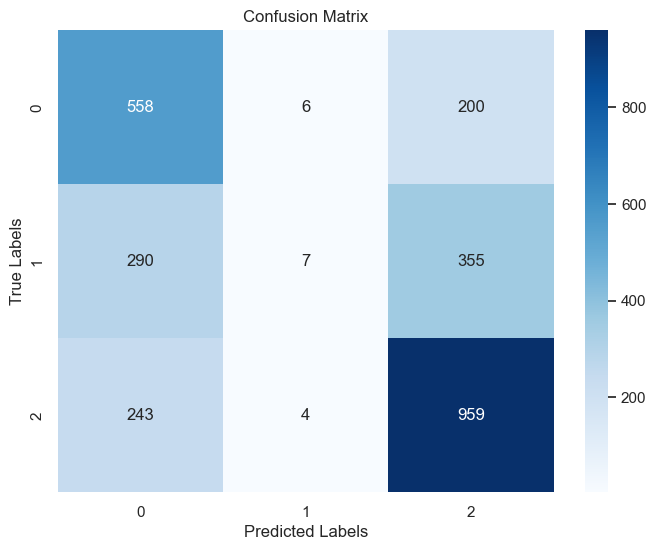

Confusion Matrix:
[[558   6 200]
 [290   7 355]
 [243   4 959]]


In [269]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#from sklearn.metrics import confusion_matrix

# Generate confusion matrix
#conf_matrix2 = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot heatmap
#plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues")
#plt.title("Confusion Matrix")
#plt.xlabel("Predicted Labels")
#plt.ylabel("True Labels")
#plt.show()

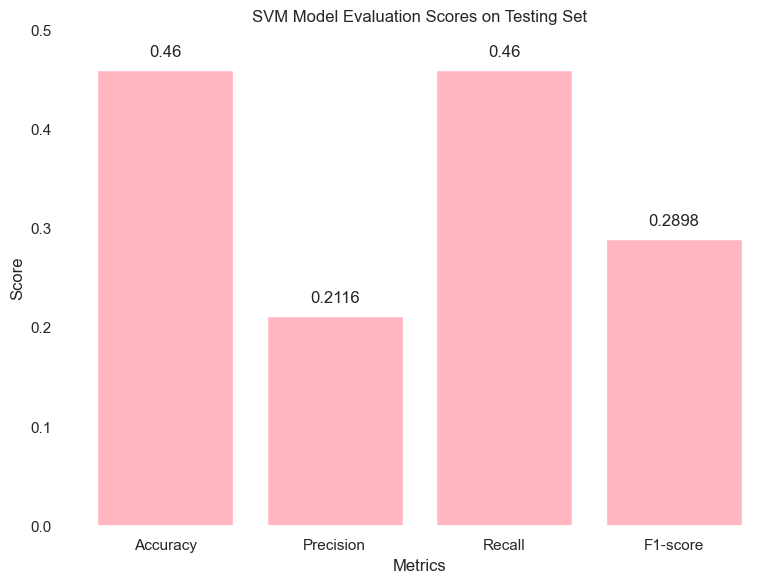

In [284]:
import matplotlib.pyplot as plt

# Evaluation scores
scores = {
    'Accuracy': 0.4600,
    'Precision': 0.2116,
    'Recall': 0.4600,
    'F1-score': 0.2898
}

# Extract labels and scores
labels = list(scores.keys())
values = list(scores.values())

# Set a soft pink color
color = 'lightpink'

# Create bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=color)

# Add text annotations on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

# Labeling and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('SVM Model Evaluation Scores on Testing Set')
plt.ylim(0, 0.5)  # Adjust y-axis limit for better visualization of scores
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


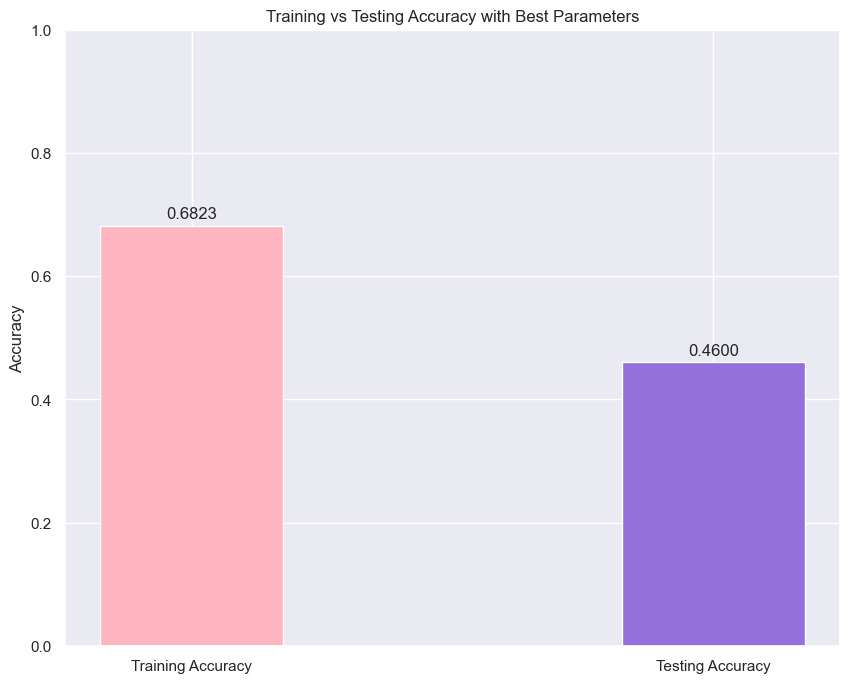

In [270]:
# Compare
import matplotlib.pyplot as plt
import numpy as np

# Data
#training_accuracy_best_param = best_logistic.score(X_res, y_res)
#testing_accuracy_best_param = accuracy_score(y_test, y_pred_lr)

# Colors
colors = ['lightpink', 'mediumpurple']

# Labels
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy_SVM, test_accuracy_SVM ]

# Plot
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axes here
bars = ax.bar(x, values, width, color=colors)

# Add labels, title, and legend
ax.set_ylabel('Accuracy')
ax.set_title('Training vs Testing Accuracy with Best Parameters')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)  # Set y-axis limits between 0 and 1

# Add data labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


# Model Comparison

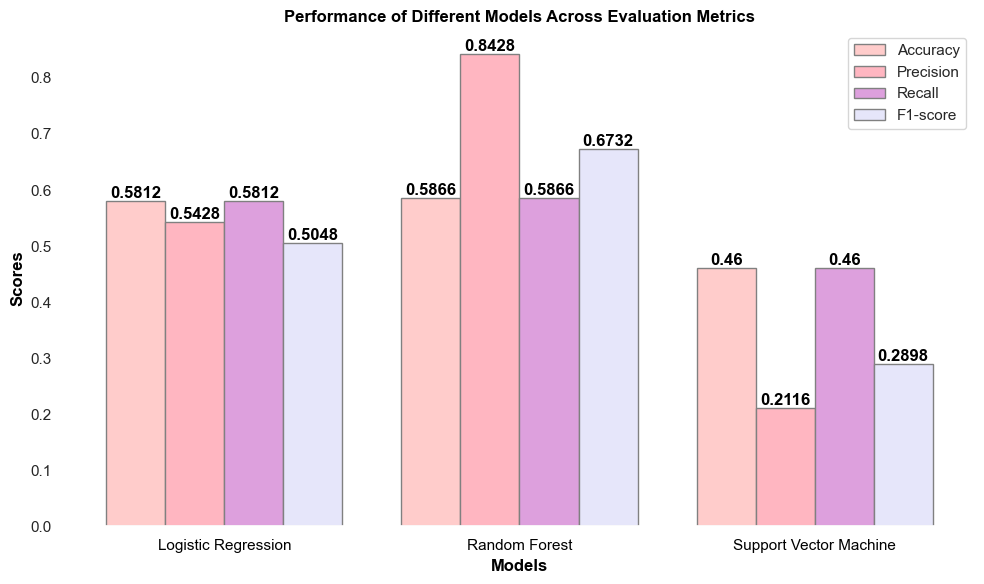

In [283]:
import matplotlib.pyplot as plt

# Data for the three models and their evaluation metrics
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
accuracy = [0.5812, 0.5866, 0.4600]
precision = [0.5428, 0.8428, 0.2116]
recall = [0.5812, 0.5866, 0.4600]
f1_score = [0.5048, 0.6732, 0.2898]

# Define the width of each bar
bar_width = 0.2

plt.figure(figsize=(10, 6))
plt.rcParams.update({'axes.facecolor': 'white', 'figure.facecolor': 'white'})  # Set background to white

# Set the positions of the bars on the x-axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the grouped bar chart with soft pastel pink and purple shades
bars1 = plt.bar(r1, accuracy, color='#ffcccb', width=bar_width, edgecolor='grey', label='Accuracy')
bars2 = plt.bar(r2, precision, color='#ffb6c1', width=bar_width, edgecolor='grey', label='Precision')
bars3 = plt.bar(r3, recall, color='#dda0dd', width=bar_width, edgecolor='grey', label='Recall')
bars4 = plt.bar(r4, f1_score, color='#e6e6fa', width=bar_width, edgecolor='grey', label='F1-score')

# Add labels and title
plt.xlabel('Models', fontweight='bold', color='black')
plt.xticks([r + bar_width * 1.5 for r in range(len(models))], models, color='black')
plt.ylabel('Scores', fontweight='bold', color='black')
plt.title('Performance of Different Models Across Evaluation Metrics', fontweight='bold', color='black')
plt.legend()

# Function to add value labels
def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 4), 
                 ha='center', va='bottom', fontweight='bold', color='black')

# Add value labels to each bar
add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

# Remove grid
plt.grid(False)

# Show plot
plt.tight_layout()
plt.show()
